In [1]:
import pandas as pd
import numpy as np

Spliting the dataset into 70:15:15 (train: test: validation).

In [2]:
df = pd.read_csv("Heart Disease.csv")
df= df.dropna()



train_size = int(0.7 * len(df))
temp_size = len(df) - train_size
val_size = temp_size // 2

training_split = df[:train_size]
temp = df[train_size:]
validation_split = temp[:val_size]
testing_split = temp[val_size:]

print("Whole dataset Size (100%):", df.shape)
print("Training Split Size (70%):", training_split.shape)
print("Validation Split Size (15%):", validation_split.shape)
print("Testing Split Size (15%):", testing_split.shape)


X_train = training_split.drop(columns=['HeartDisease']).values
y_train = training_split['HeartDisease'].values
X_val = validation_split.drop(columns=['HeartDisease']).values
y_val = validation_split['HeartDisease'].values
X_test = testing_split.drop(columns=['HeartDisease']).values
y_test = testing_split['HeartDisease'].values

Whole dataset Size (100%): (3656, 16)
Training Split Size (70%): (2559, 16)
Validation Split Size (15%): (548, 16)
Testing Split Size (15%): (549, 16)


 (a) (3 marks) Implement Logistic Regression using Batch Gradient Descent. Plot training loss vs. iteration, validation loss vs. iteration, training accuracy vs. iteration,
 and validation accuracy vs. iteration. Comment on the convergence of the model.
 Compare and analyze the plots.
 

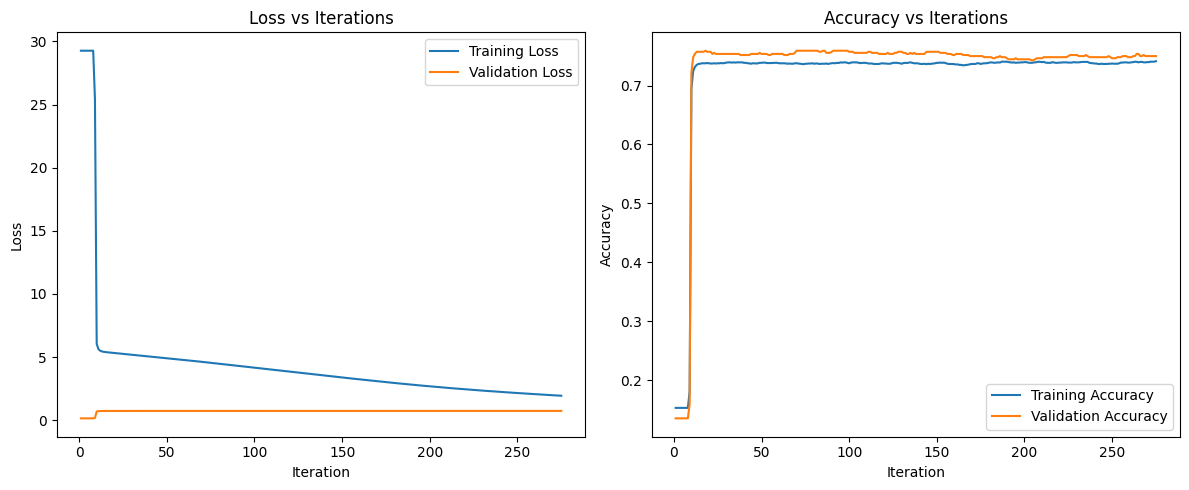

In [3]:
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def compute_accuracy(y_true, y_pred):
    y_pred_labels = (y_pred >= 0.5).astype(int)
    return np.mean(y_true == y_pred_labels)

def initialize_parameters(n_features):
    weight = np.ones(n_features)
    bias = 0
    return weight, bias

def train_logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.01, num_iterations=1000):
    m_train, n = X_train.shape
    m_val = X_val.shape[0]

    weight, bias = initialize_parameters(n)

    train_losses = np.zeros(num_iterations)
    val_losses = np.zeros(num_iterations)
    train_accuracies = np.zeros(num_iterations)
    val_accuracies = np.zeros(num_iterations)

    for i in range(num_iterations):

        predictions_train = np.dot(X_train, weight) + bias
        y_pred_train = sigmoid(predictions_train)


        train_losses[i] = compute_loss(y_train, y_pred_train)
        train_accuracies[i] = compute_accuracy(y_train, y_pred_train)


        predictions_val = np.dot(X_val, weight) + bias
        y_pred_val = sigmoid(predictions_val)

        val_losses[i] = compute_loss(y_val, y_pred_val)
        val_accuracies[i] = compute_accuracy(y_val, y_pred_val)

        errors_train = y_pred_train - y_train
        dw = (1 / m_train) * np.dot(X_train.T, errors_train)
        db = (1 / m_train) * np.sum(errors_train)


        weight -= learning_rate * dw
        bias -= learning_rate * db

    return weight, bias, train_losses, val_losses, train_accuracies, val_accuracies

def plot(num_iterations, train_losses, train_accuracies, val_losses, val_accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_iterations+1), train_losses, label="Training Loss")
    plt.plot(range(1, num_iterations+1), val_losses, label="Validation Loss")
    plt.title("Loss vs Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_iterations+1), train_accuracies, label="Training Accuracy")
    plt.plot(range(1, num_iterations+1), val_accuracies, label="Validation Accuracy")
    plt.title("Accuracy vs Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

def predict(X, weight, bias):
    linear_model = np.dot(X, weight) + bias
    y_pred = sigmoid(linear_model)
    return (y_pred > 0.5).astype(int)

learning_rate = 0.001
num_iterations = 275

weight, bias, train_losses, val_losses, train_accuracies, val_accuracies = train_logistic_regression(
    X_train, y_train, X_val, y_val, learning_rate, num_iterations
)

plot(num_iterations, train_losses, train_accuracies, train_accuracies, val_accuracies)

y_pred_test = predict(X_test, weight, bias)

 (b) (2 marks) Investigate and compare the performance of the model with different feature scaling methods: Min-max scaling and No scaling. Plot the loss vs. iteration for each method and discuss the impact of feature scaling on model convergence.

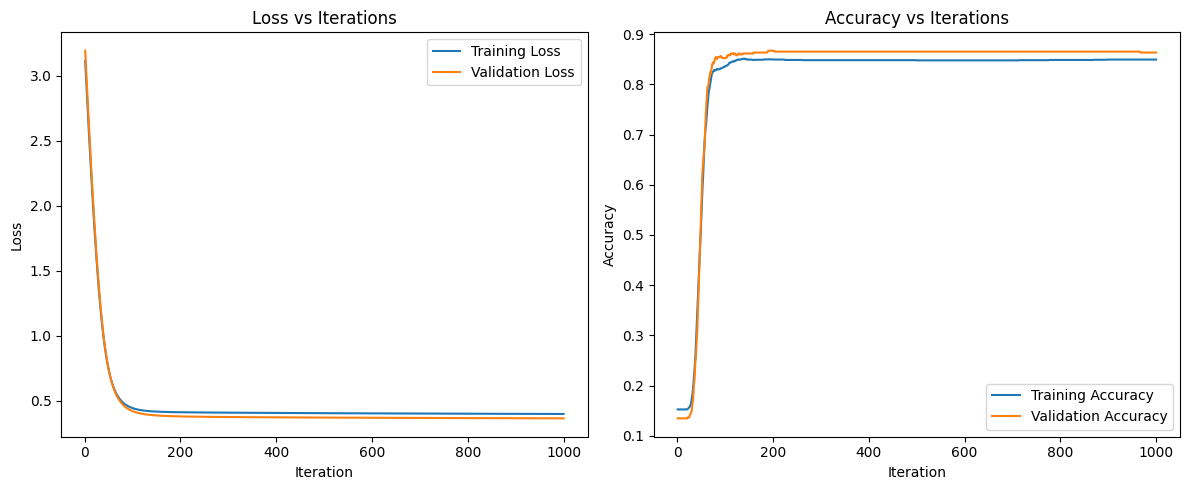

In [4]:
def minMAX(X):
    min= np.min(X, axis=0)
    max= np.max(X, axis=0)
    return (X- min)/(max-min)

minMaxDf= minMAX(df.copy())


training_split = minMaxDf[:train_size]
temp = minMaxDf[train_size:]
validation_split = temp[:val_size]
testing_split = temp[val_size:]

X_train = training_split.drop(columns=['HeartDisease']).values
y_train = training_split['HeartDisease'].values
X_val = validation_split.drop(columns=['HeartDisease']).values
y_val  = validation_split['HeartDisease'].values
X_test  = testing_split.drop(columns=['HeartDisease']).values
y_test  = testing_split['HeartDisease'].values
learning_rate_mm = 0.05
num_iterations_mm = 1000
weight, bias, train_losses, val_losses, train_accuracies, val_accuracies = train_logistic_regression(
    X_train , y_train , X_val , y_val , learning_rate_mm, num_iterations_mm
)

plot(num_iterations_mm, train_losses, train_accuracies, val_losses, val_accuracies)



(c) (2 marks) Calculate and present the confusion matrix for the validation set. Report precision, recall, F1 score, and ROC-AUC score for the model based on the validation set. Comment on how these metrics provide insight into the model’s performance.

Confusion Matrix:
[[472   2]
 [ 73   1]]


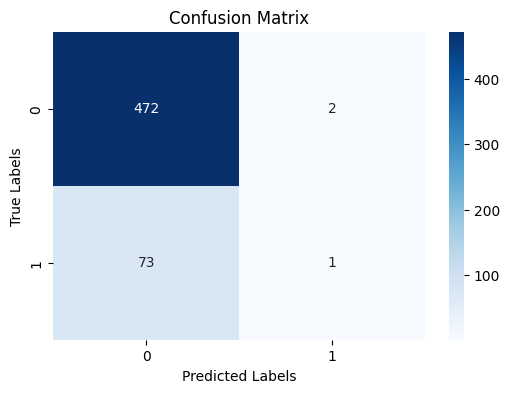

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_mm = np.dot(X_val, weight) + bias
y_pred_prob_mm = sigmoid(y_pred_mm)
y_pred_labels_mm = (y_pred_prob_mm >= 0.5).astype(int)  

cm = confusion_matrix(y_val, y_pred_labels_mm)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

threshold = 0.5
y_pred_mm = (y_pred_prob_mm >= threshold).astype(int)

precision = precision_score(y_val, y_pred_mm)

recall = recall_score(y_val, y_pred_mm)

f1 = f1_score(y_val, y_pred_mm)

roc_auc = roc_auc_score(y_val, y_pred_prob_mm)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")



Precision: 0.3333333333333333
Recall: 0.013513513513513514
F1 Score: 0.025974025974025976
ROC-AUC Score: 0.7457805907172995


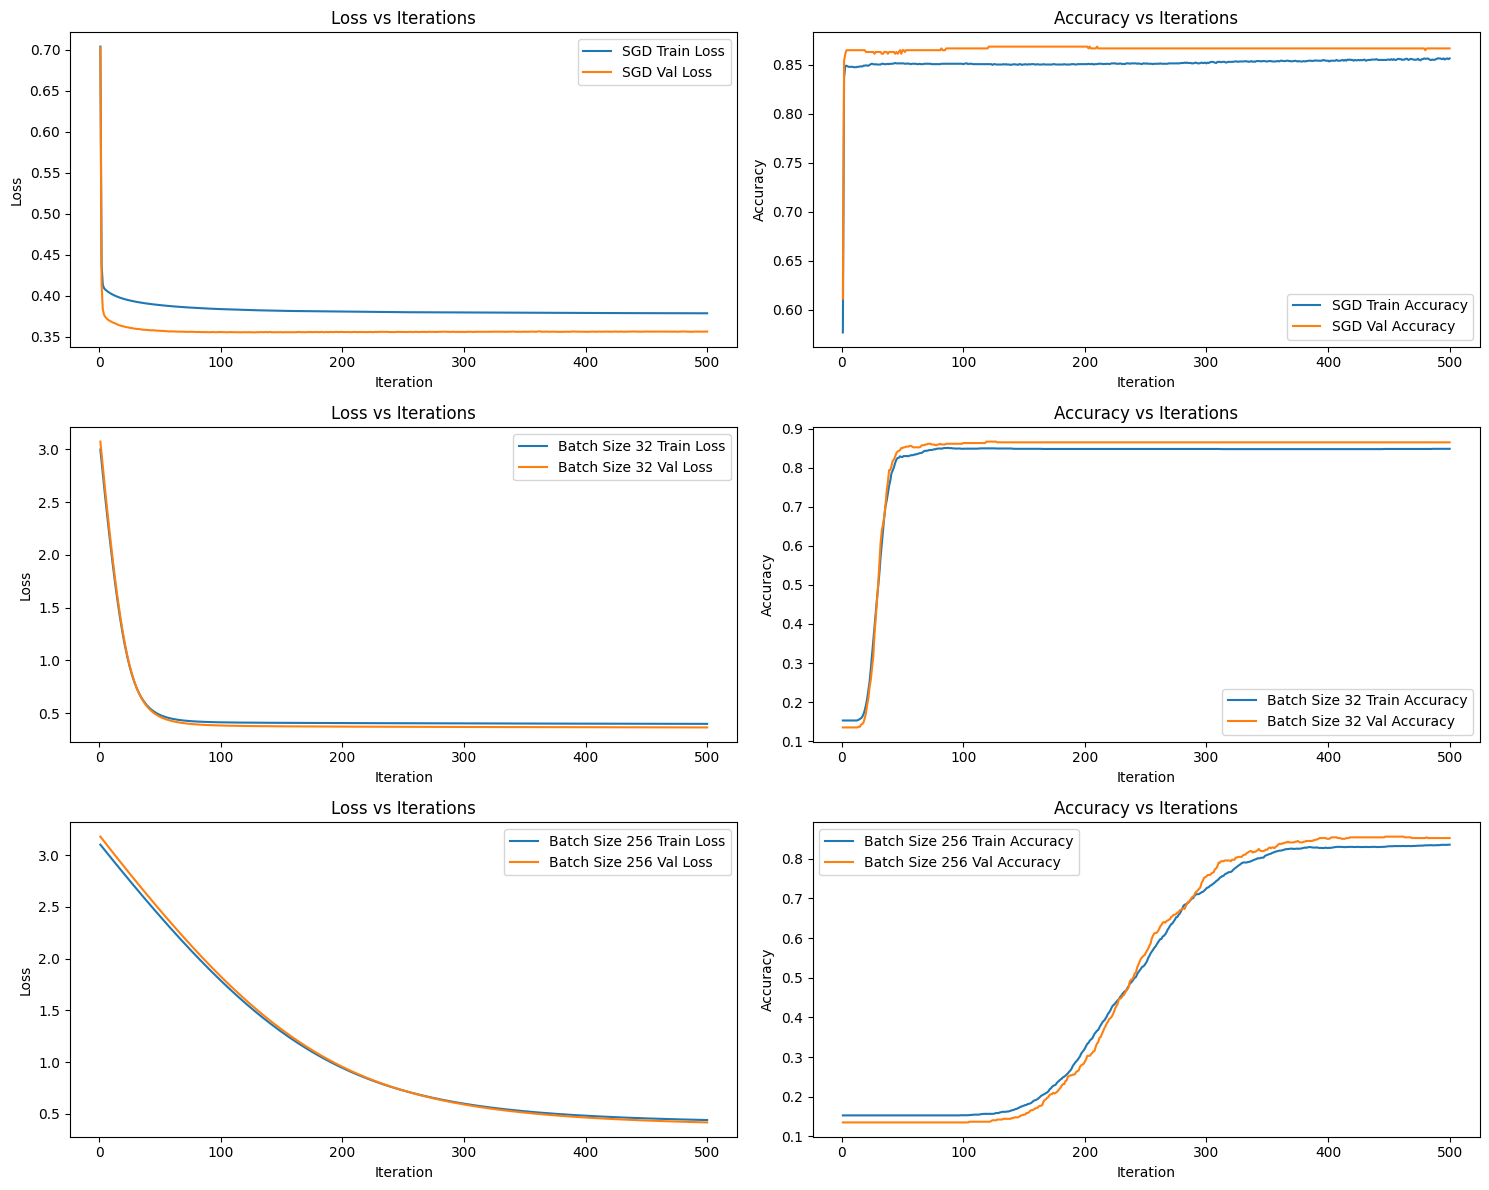

In [7]:
def create_mini_batches(X, y, batch_size):
    m = X.shape[0]
    permutation = np.random.permutation(m)
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]

    mini_batches = []
    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        mini_batches.append((X_batch, y_batch))
    
    return mini_batches

def train_logistic_regression_miniBatch(X_train, y_train, X_val, y_val, learning_rate=0.01, num_iterations=1000, batch_size=64):
    m_train, n = X_train.shape

    weight, bias = initialize_parameters(n)

    train_losses = np.zeros(num_iterations)
    val_losses = np.zeros(num_iterations)
    train_accuracies = np.zeros(num_iterations)
    val_accuracies = np.zeros(num_iterations)

    for i in range(num_iterations):
        mini_batches = create_mini_batches(X_train, y_train, batch_size)

        for X_mini, y_mini in mini_batches:
            m_mini = X_mini.shape[0]

            predictions_mini = np.dot(X_mini, weight) + bias
            y_pred_mini = sigmoid(predictions_mini)

            errors_mini = y_pred_mini - y_mini
            dw = (1 / m_mini) * np.dot(X_mini.T, errors_mini)
            db = (1 / m_mini) * np.sum(errors_mini)

            weight -= learning_rate * dw
            bias -= learning_rate * db

        predictions_train = sigmoid(np.dot(X_train, weight) + bias)
        predictions_val = sigmoid(np.dot(X_val, weight) + bias)


        train_losses[i] = compute_loss(y_train, predictions_train)
        train_accuracies[i] = compute_accuracy(y_train, predictions_train)

        val_losses[i] = compute_loss(y_val, predictions_val)
        val_accuracies[i] = compute_accuracy(y_val, predictions_val)

    return weight, bias, train_losses, val_losses, train_accuracies, val_accuracies

def plot(num_iterations, 
         train_losses_1, val_losses_1, train_accuracies_1, val_accuracies_1, label1,
         train_losses_2, val_losses_2, train_accuracies_2, val_accuracies_2, label2,
         train_losses_3, val_losses_3, train_accuracies_3, val_accuracies_3, label3):
    
    plt.figure(figsize=(15, 12))

    plt.subplot(3, 2, 1)
    plt.plot(range(1, num_iterations + 1), train_losses_1, label=f'{label1} Train Loss')
    plt.plot(range(1, num_iterations + 1), val_losses_1, label=f'{label1} Val Loss')
    plt.title('Loss vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(range(1, num_iterations + 1), train_accuracies_1, label=f'{label1} Train Accuracy')
    plt.plot(range(1, num_iterations + 1), val_accuracies_1, label=f'{label1} Val Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(range(1, num_iterations + 1), train_losses_2, label=f'{label2} Train Loss')
    plt.plot(range(1, num_iterations + 1), val_losses_2, label=f'{label2} Val Loss')
    plt.title('Loss vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(range(1, num_iterations + 1), train_accuracies_2, label=f'{label2} Train Accuracy')
    plt.plot(range(1, num_iterations + 1), val_accuracies_2, label=f'{label2} Val Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(3, 2, 5)
    plt.plot(range(1, num_iterations + 1), train_losses_3, label=f'{label3} Train Loss')
    plt.plot(range(1, num_iterations + 1), val_losses_3, label=f'{label3} Val Loss')
    plt.title('Loss vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(range(1, num_iterations + 1), train_accuracies_3, label=f'{label3} Train Accuracy')
    plt.plot(range(1, num_iterations + 1), val_accuracies_3, label=f'{label3} Val Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

learning_rate_mm = 0.001
num_iterations = 500

weight, bias, train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd = train_logistic_regression_miniBatch(
    X_train, y_train, X_val, y_val, learning_rate_mm, num_iterations, batch_size=1
)

weight, bias, train_losses_mbgd_32, val_losses_mbgd_32, train_accuracies_mbgd_32, val_accuracies_mbgd_32 = train_logistic_regression_miniBatch(
    X_train, y_train, X_val, y_val, learning_rate_mm, num_iterations, batch_size=32
)

weight, bias, train_losses_mbgd_256, val_losses_mbgd_256, train_accuracies_mbgd_256, val_accuracies_mbgd_256 = train_logistic_regression_miniBatch(
    X_train, y_train, X_val, y_val, learning_rate_mm, num_iterations, batch_size=256
)

plot(
    num_iterations, train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd, 'SGD',
    train_losses_mbgd_32, val_losses_mbgd_32, train_accuracies_mbgd_32, val_accuracies_mbgd_32, 'Batch Size 32',
    train_losses_mbgd_256, val_losses_mbgd_256, train_accuracies_mbgd_256, val_accuracies_mbgd_256, 'Batch Size 256'
)


In [8]:
import matplotlib.pyplot as plt

def train_logistic_regression_miniBatch(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate=0.01, num_iterations=1000, batch_size=64):
    m_train, n = X_train.shape

    weight, bias = initialize_parameters(n)

    train_losses = np.zeros(num_iterations)
    val_losses = np.zeros(num_iterations)
    test_losses = np.zeros(num_iterations)
    train_accuracies = np.zeros(num_iterations)
    val_accuracies = np.zeros(num_iterations)
    test_accuracies = np.zeros(num_iterations)

    for i in range(num_iterations):
        mini_batches = create_mini_batches(X_train, y_train, batch_size)

        for X_mini, y_mini in mini_batches:
            m_mini = X_mini.shape[0]


            predictions_mini = np.dot(X_mini, weight) + bias
            y_pred_mini = sigmoid(predictions_mini)

   
            errors_mini = y_pred_mini - y_mini
            dw = (1 / m_mini) * np.dot(X_mini.T, errors_mini)
            db = (1 / m_mini) * np.sum(errors_mini)


            weight -= learning_rate * dw
            bias -= learning_rate * db


        predictions_train = sigmoid(np.dot(X_train, weight) + bias)
        predictions_val = sigmoid(np.dot(X_val, weight) + bias)
        predictions_test = sigmoid(np.dot(X_test, weight) + bias)

        train_losses[i] = compute_loss(y_train, predictions_train)
        train_accuracies[i] = compute_accuracy(y_train, predictions_train)

        val_losses[i] = compute_loss(y_val, predictions_val)
        val_accuracies[i] = compute_accuracy(y_val, predictions_val)

        test_losses[i] = compute_loss(y_test, predictions_test)
        test_accuracies[i] = compute_accuracy(y_test, predictions_test)

    return weight, bias, train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies

def plot_accuracy_vs_iterations(num_iterations, 
                                train_accuracies_1, val_accuracies_1, test_accuracies_1, label1,
                                train_accuracies_2, val_accuracies_2, test_accuracies_2, label2,
                                train_accuracies_3, val_accuracies_3, test_accuracies_3, label3):
    
    plt.figure(figsize=(15, 12))

    # Training Accuracy vs Iterations
    plt.subplot(3, 1, 1)
    plt.plot(range(1, num_iterations + 1), train_accuracies_1, label=f'{label1} Train Accuracy')
    plt.plot(range(1, num_iterations + 1), train_accuracies_2, label=f'{label2} Train Accuracy')
    plt.plot(range(1, num_iterations + 1), train_accuracies_3, label=f'{label3} Train Accuracy')
    plt.title('Training Accuracy vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    # Validation Accuracy vs Iterations
    plt.subplot(3, 1, 2)
    plt.plot(range(1, num_iterations + 1), val_accuracies_1, label=f'{label1} Val Accuracy')
    plt.plot(range(1, num_iterations + 1), val_accuracies_2, label=f'{label2} Val Accuracy')
    plt.plot(range(1, num_iterations + 1), val_accuracies_3, label=f'{label3} Val Accuracy')
    plt.title('Validation Accuracy vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    # Test Accuracy vs Iterations
    plt.subplot(3, 1, 3)
    plt.plot(range(1, num_iterations + 1), test_accuracies_1, label=f'{label1} Test Accuracy')
    plt.plot(range(1, num_iterations + 1), test_accuracies_2, label=f'{label2} Test Accuracy')
    plt.plot(range(1, num_iterations + 1), test_accuracies_3, label=f'{label3} Test Accuracy')
    plt.title('Test Accuracy vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_loss_vs_iterations(num_iterations, 
                             train_losses_1, val_losses_1, test_losses_1, label1,
                             train_losses_2, val_losses_2, test_losses_2, label2,
                             train_losses_3, val_losses_3, test_losses_3, label3):
    
    plt.figure(figsize=(15, 12))

    # Training Loss vs Iterations
    plt.subplot(3, 1, 1)
    plt.plot(range(1, num_iterations + 1), train_losses_1, label=f'{label1} Train Loss')
    plt.plot(range(1, num_iterations + 1), train_losses_2, label=f'{label2} Train Loss')
    plt.plot(range(1, num_iterations + 1), train_losses_3, label=f'{label3} Train Loss')
    plt.title('Training Loss vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    # Validation Loss vs Iterations
    plt.subplot(3, 1, 2)
    plt.plot(range(1, num_iterations + 1), val_losses_1, label=f'{label1} Val Loss')
    plt.plot(range(1, num_iterations + 1), val_losses_2, label=f'{label2} Val Loss')
    plt.plot(range(1, num_iterations + 1), val_losses_3, label=f'{label3} Val Loss')
    plt.title('Validation Loss vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    # Test Loss vs Iterations
    plt.subplot(3, 1, 3)
    plt.plot(range(1, num_iterations + 1), test_losses_1, label=f'{label1} Test Loss')
    plt.plot(range(1, num_iterations + 1), test_losses_2, label=f'{label2} Test Loss')
    plt.plot(range(1, num_iterations + 1), test_losses_3, label=f'{label3} Test Loss')
    plt.title('Test Loss vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


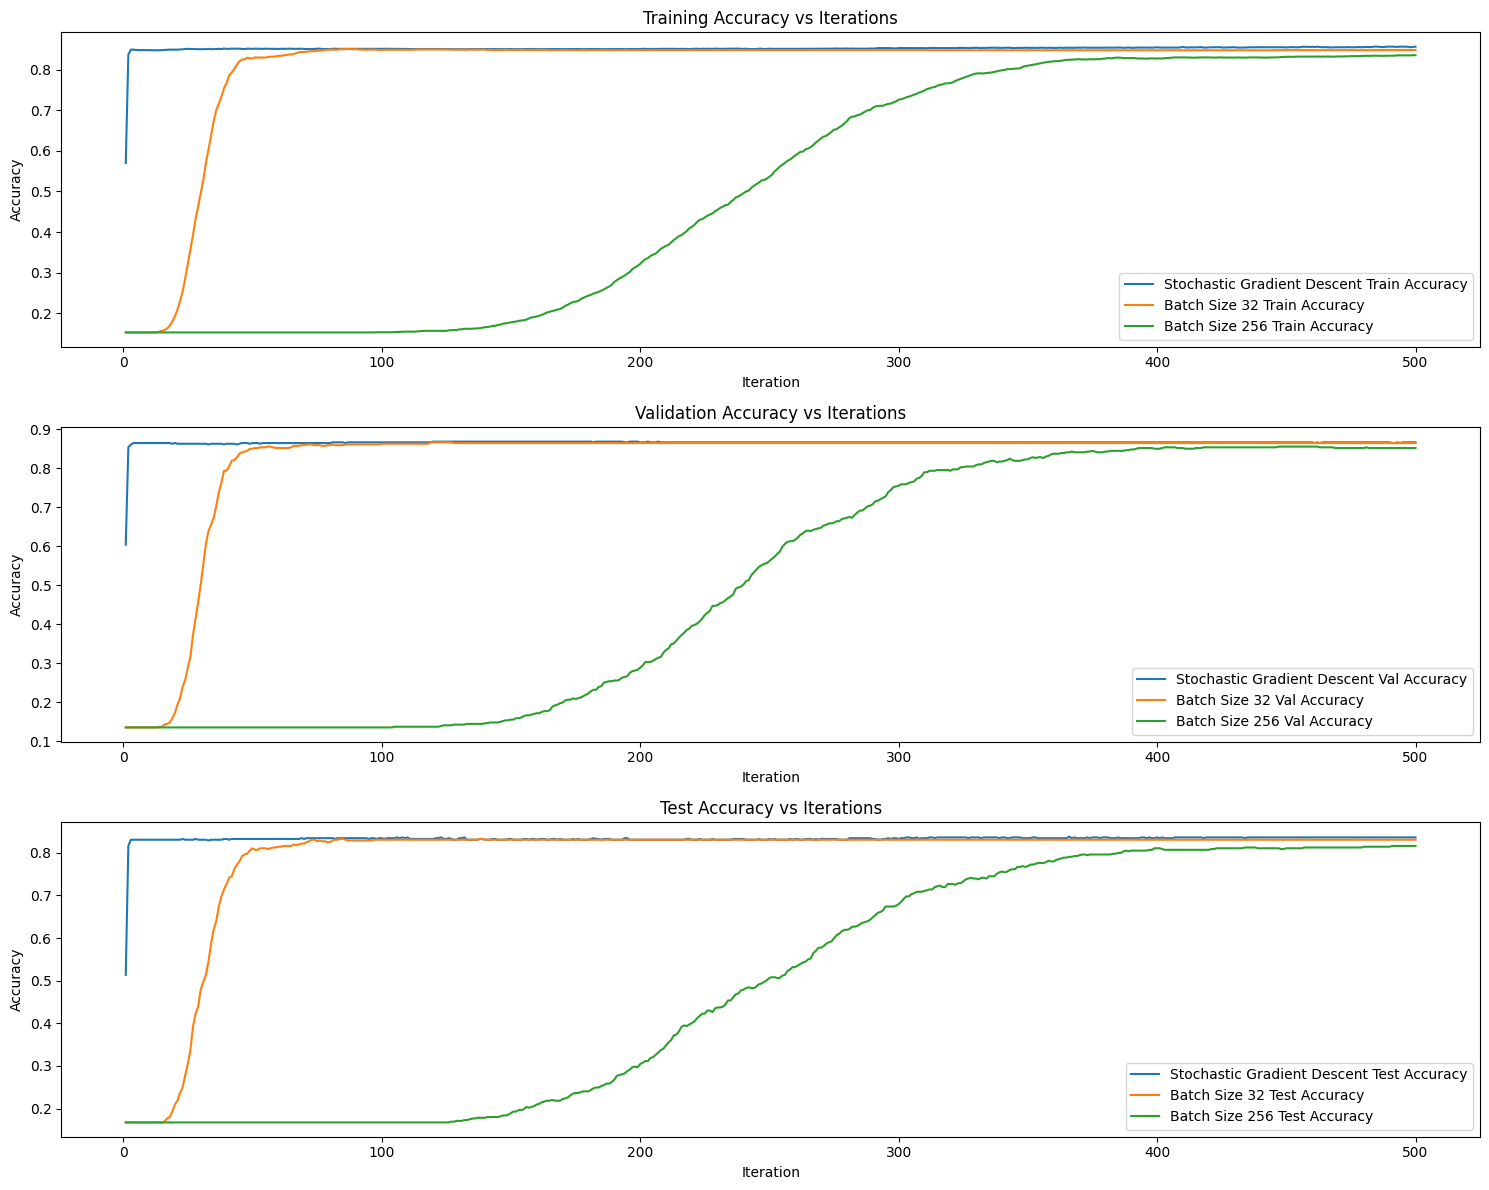

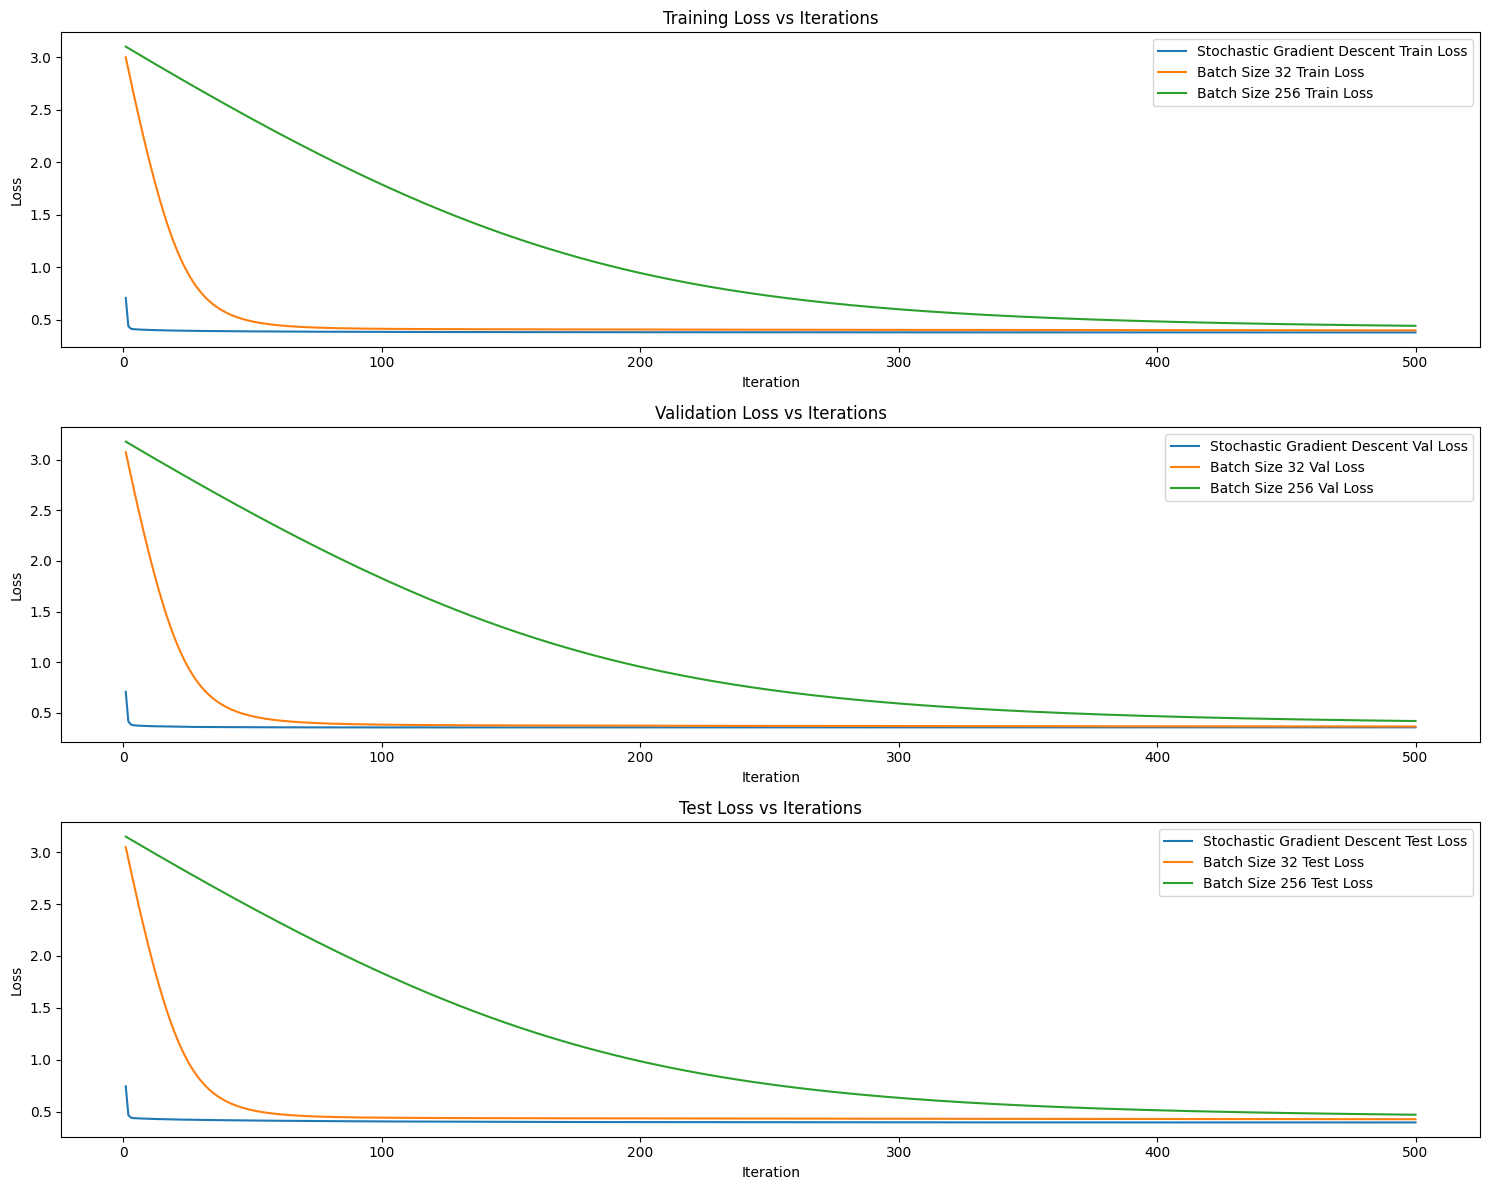

In [9]:

learning_rate_mm = 0.001
num_iterations = 500

weight, bias, train_losses_sgd, val_losses_sgd, test_losses_sgd, train_accuracies_sgd, val_accuracies_sgd, test_accuracies_sgd = train_logistic_regression_miniBatch(
    X_train, y_train, X_val, y_val, X_test, y_test, learning_rate_mm, num_iterations, batch_size=1
)

weight, bias, train_losses_mbgd_32, val_losses_mbgd_32, test_losses_mbgd_32, train_accuracies_mbgd_32, val_accuracies_mbgd_32, test_accuracies_mbgd_32 = train_logistic_regression_miniBatch(
    X_train, y_train, X_val, y_val, X_test, y_test, learning_rate_mm, num_iterations, batch_size=32
)

weight, bias, train_losses_mbgd_256, val_losses_mbgd_256, test_losses_mbgd_256, train_accuracies_mbgd_256, val_accuracies_mbgd_256, test_accuracies_mbgd_256 = train_logistic_regression_miniBatch(
    X_train, y_train, X_val, y_val, X_test, y_test, learning_rate_mm, num_iterations, batch_size=256
)

plot_accuracy_vs_iterations(
    num_iterations, 
    train_accuracies_sgd, val_accuracies_sgd, test_accuracies_sgd, 'Stochastic Gradient Descent',
    train_accuracies_mbgd_32, val_accuracies_mbgd_32, test_accuracies_mbgd_32, 'Batch Size 32',
    train_accuracies_mbgd_256, val_accuracies_mbgd_256, test_accuracies_mbgd_256, 'Batch Size 256'
)

plot_loss_vs_iterations(
    num_iterations, 
    train_losses_sgd, val_losses_sgd, test_losses_sgd, 'Stochastic Gradient Descent',
    train_losses_mbgd_32, val_losses_mbgd_32, test_losses_mbgd_32, 'Batch Size 32',
    train_losses_mbgd_256, val_losses_mbgd_256, test_losses_mbgd_256, 'Batch Size 256'
)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Importing and spliting dataset into training and testing (80:20)

In [11]:
df = pd.read_csv('Electricity BILL.csv')
print(df.head())
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


   Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480  

## A. Performing EDA

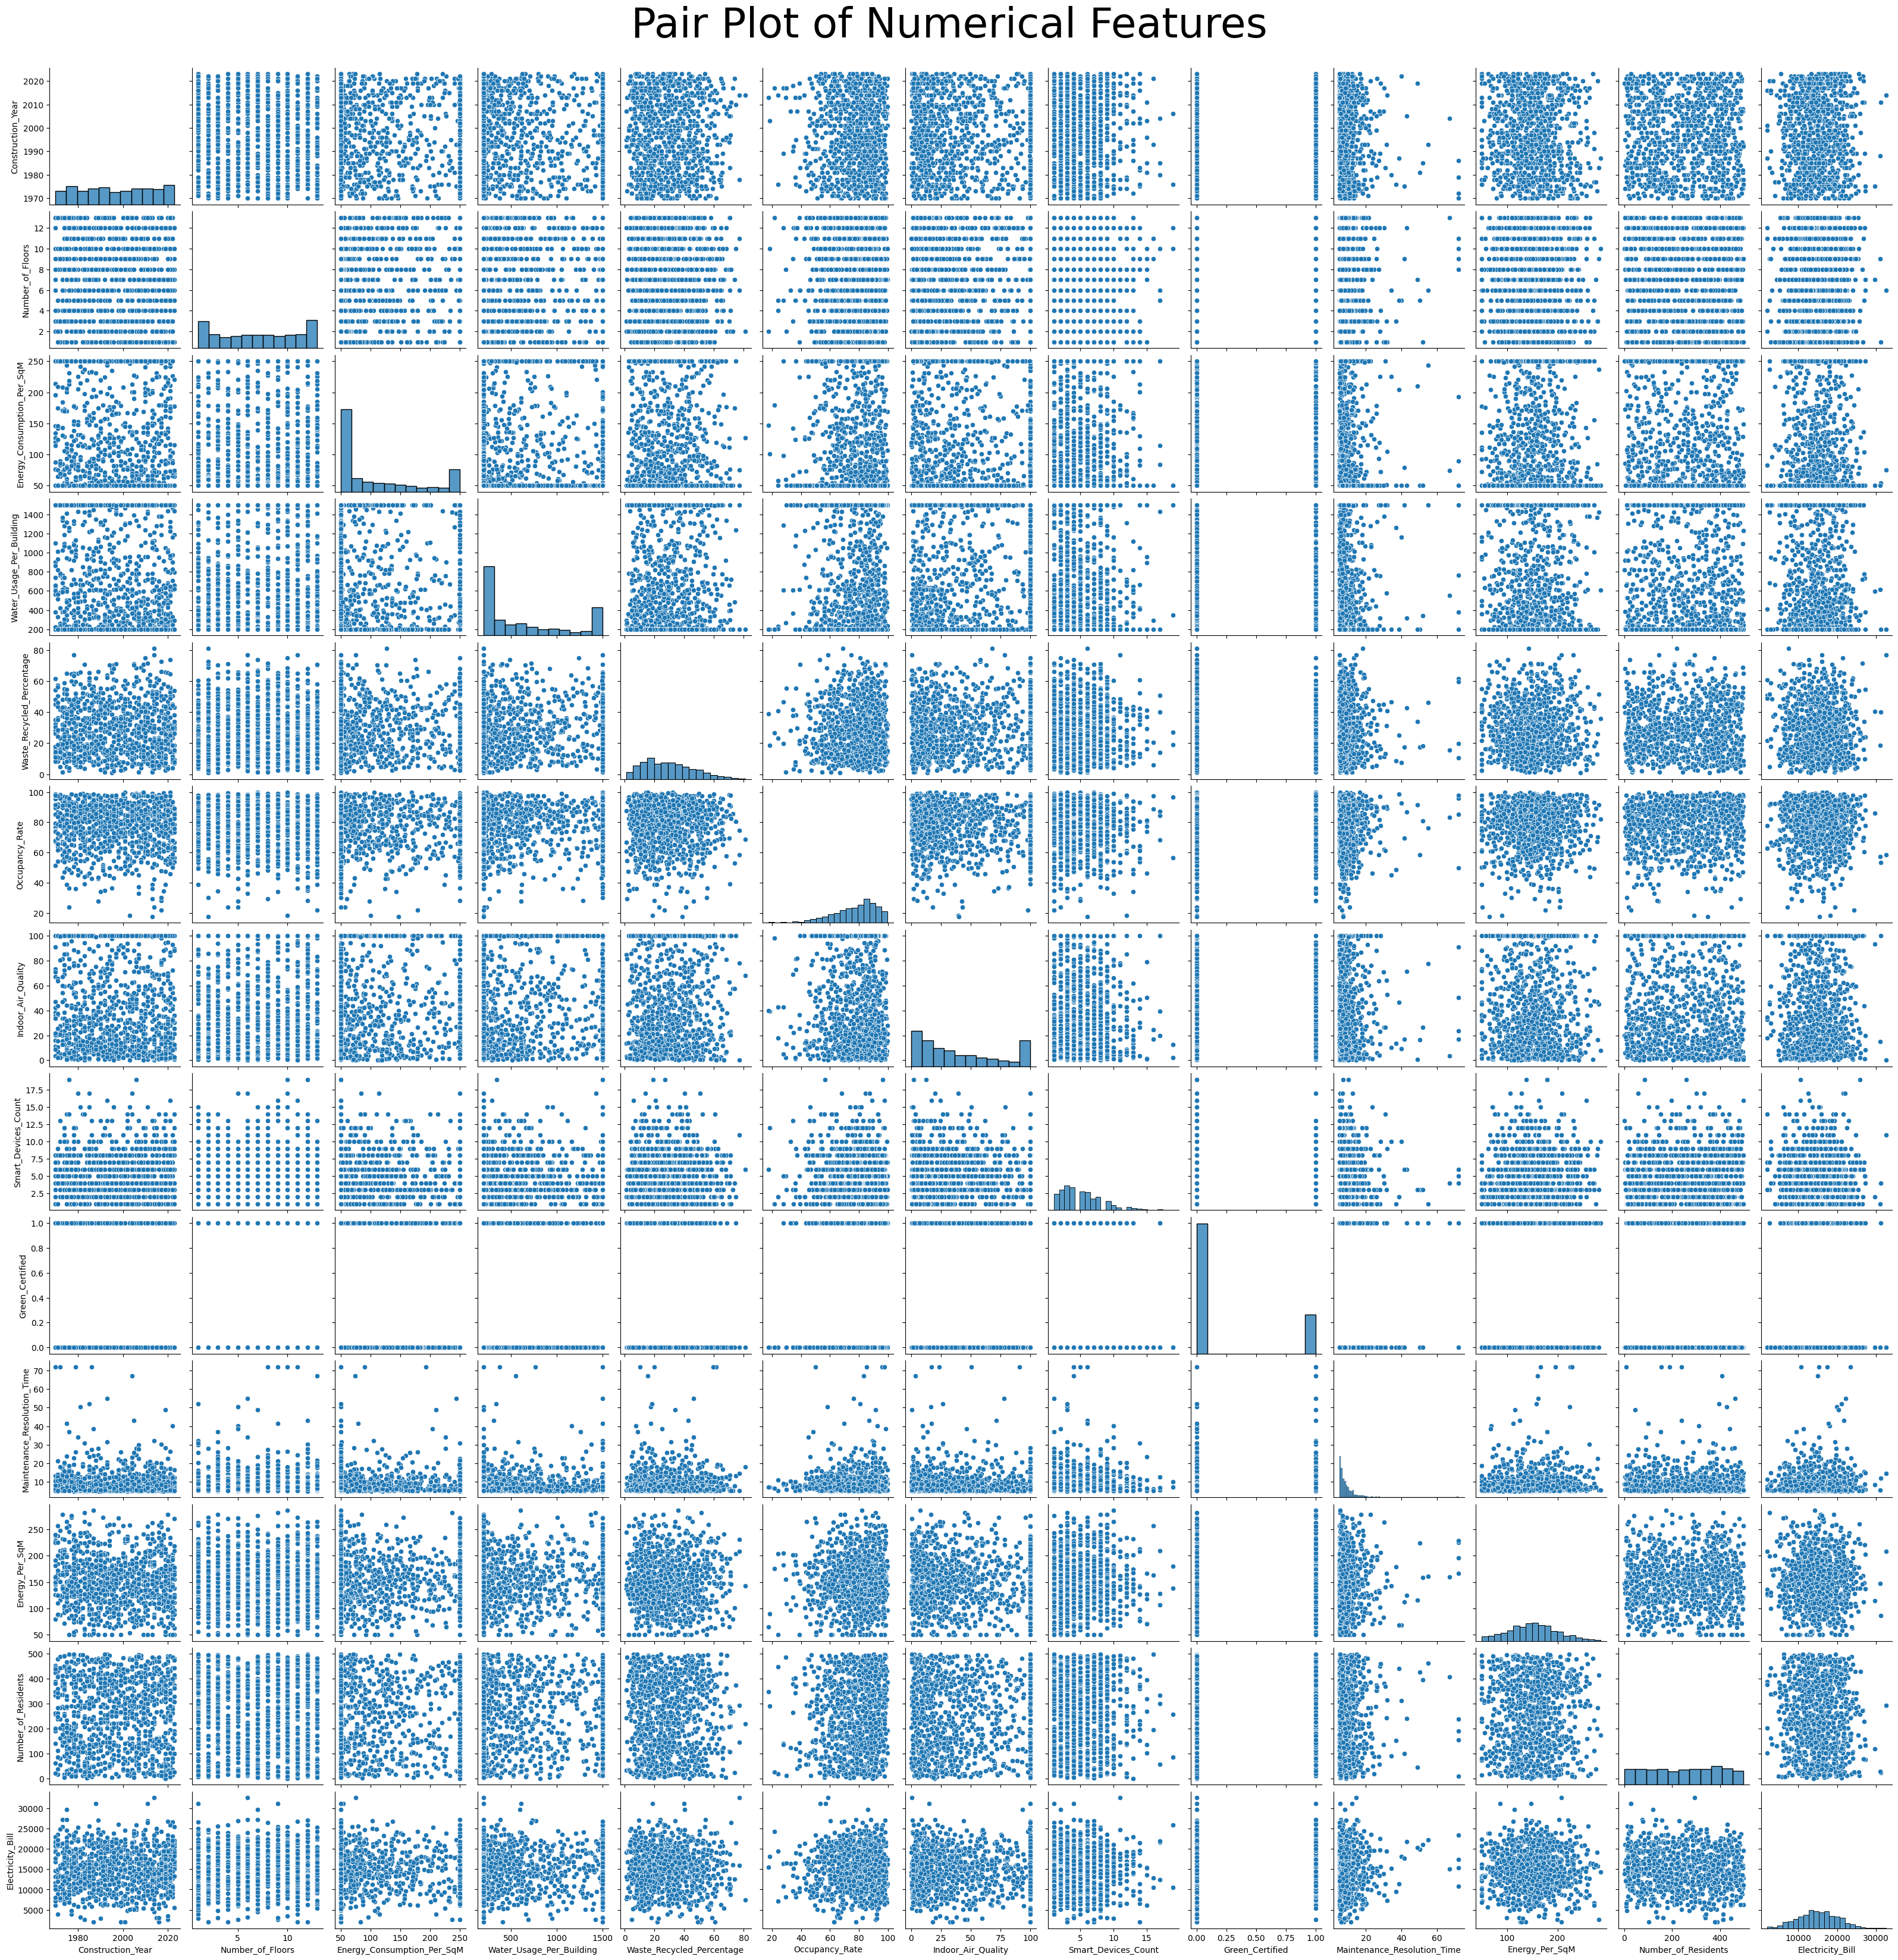

In [12]:
sns.pairplot(train_df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=50)
plt.show()

Box plots

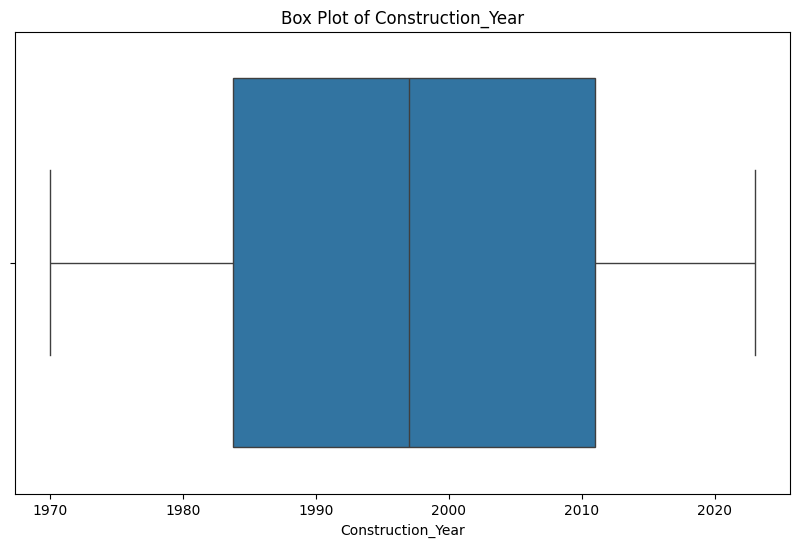

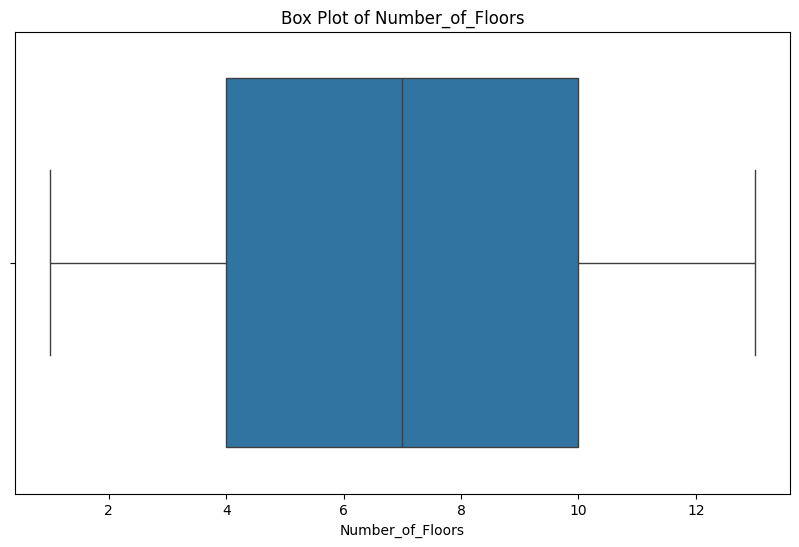

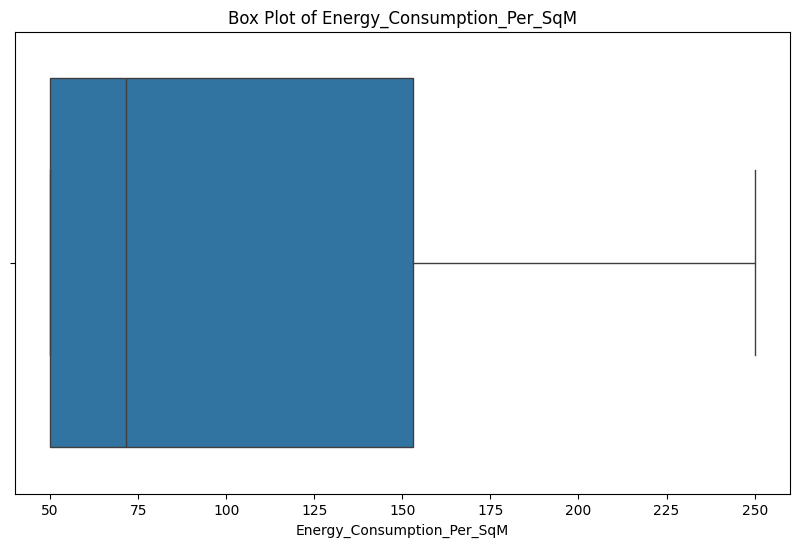

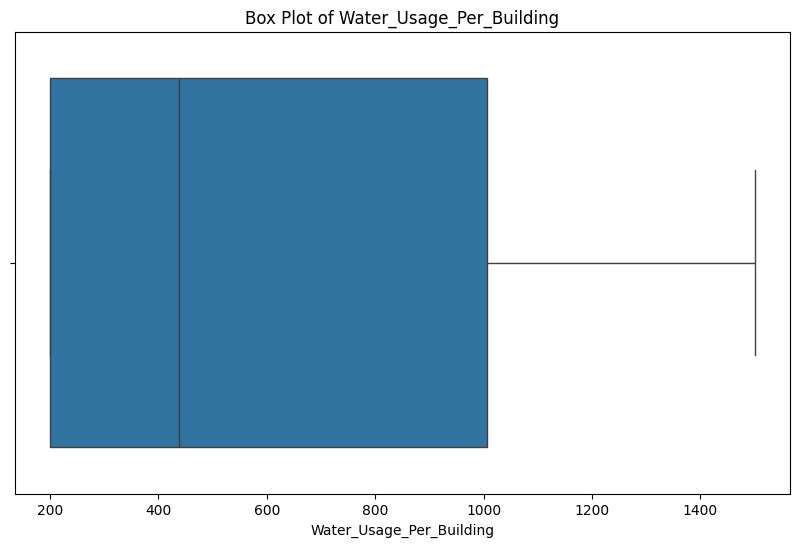

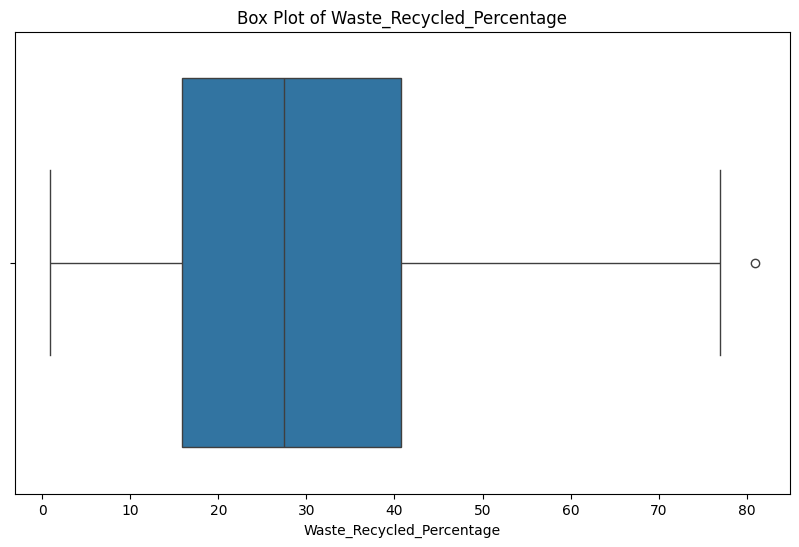

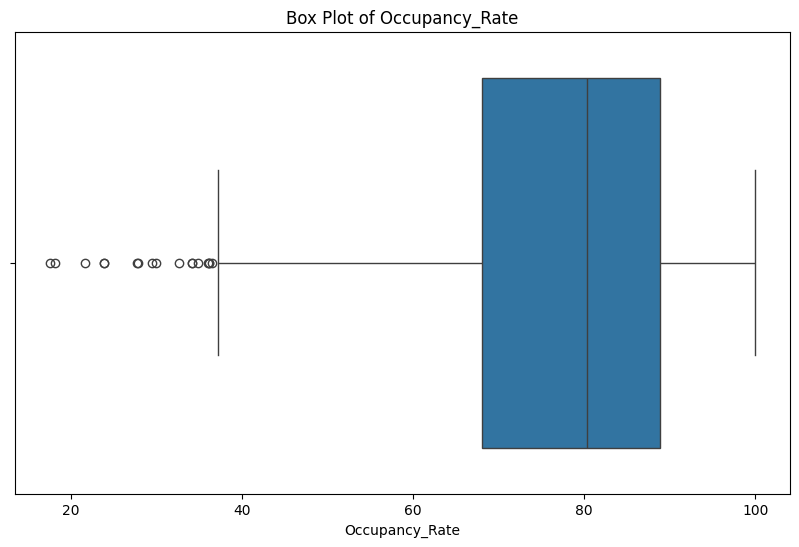

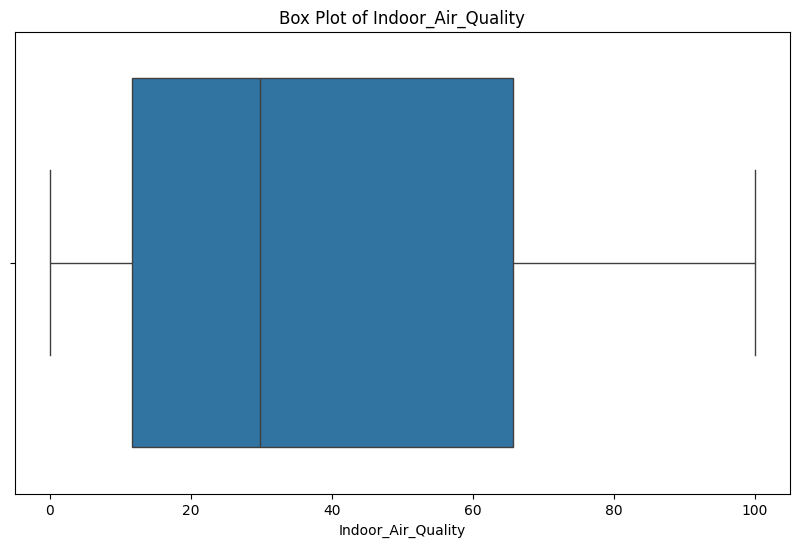

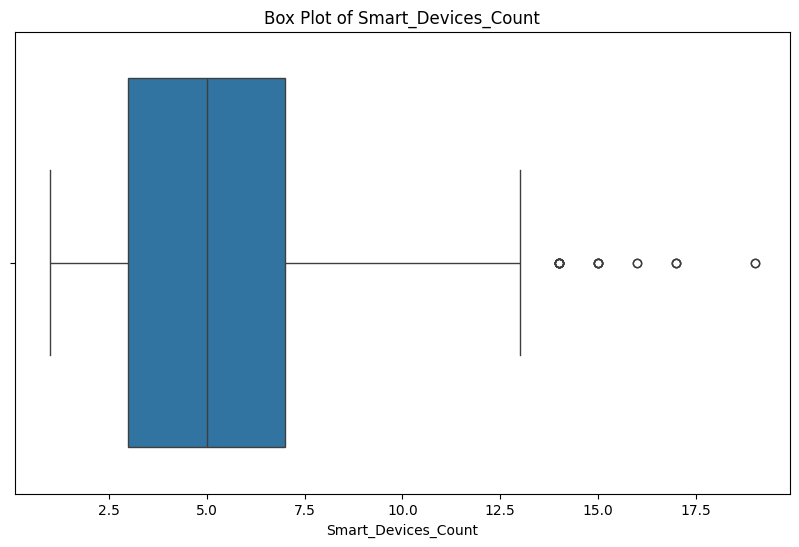

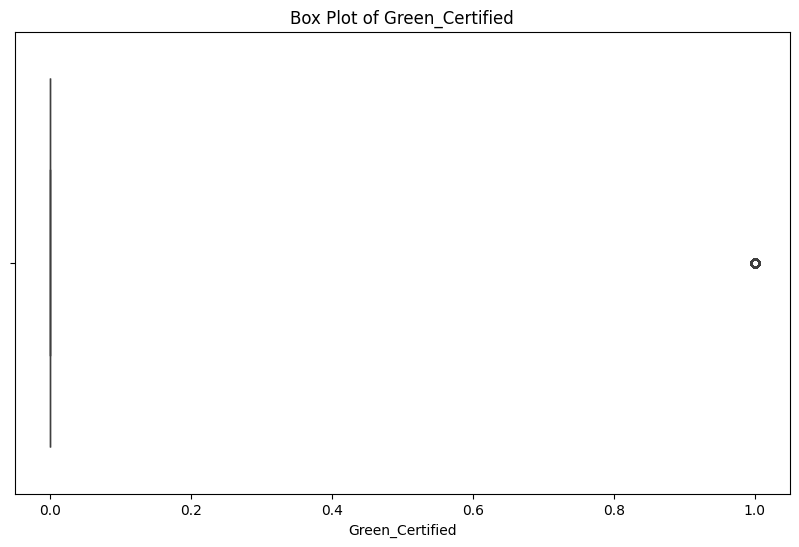

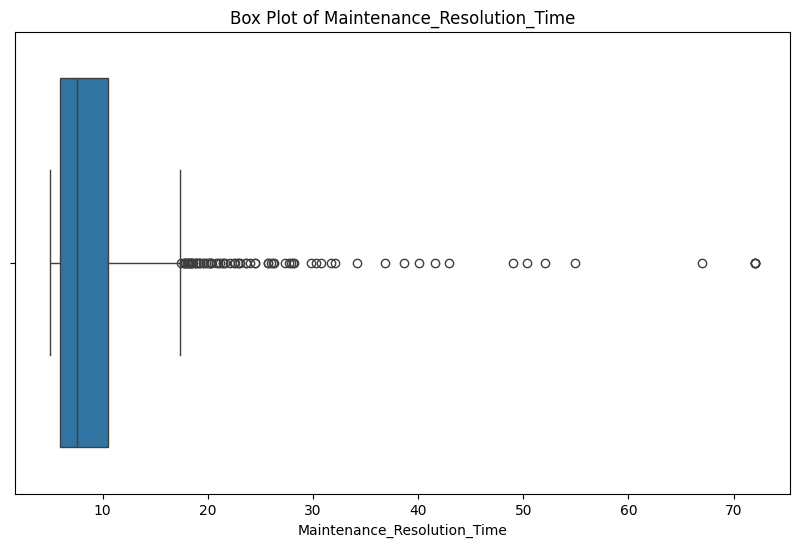

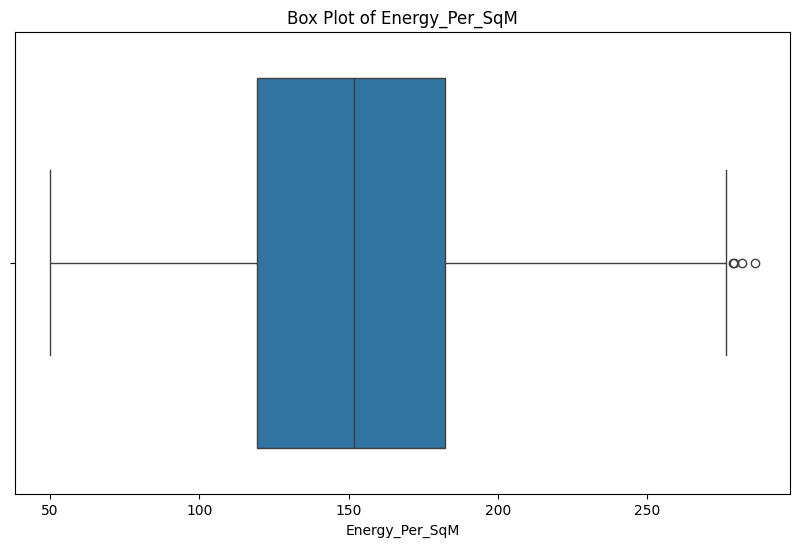

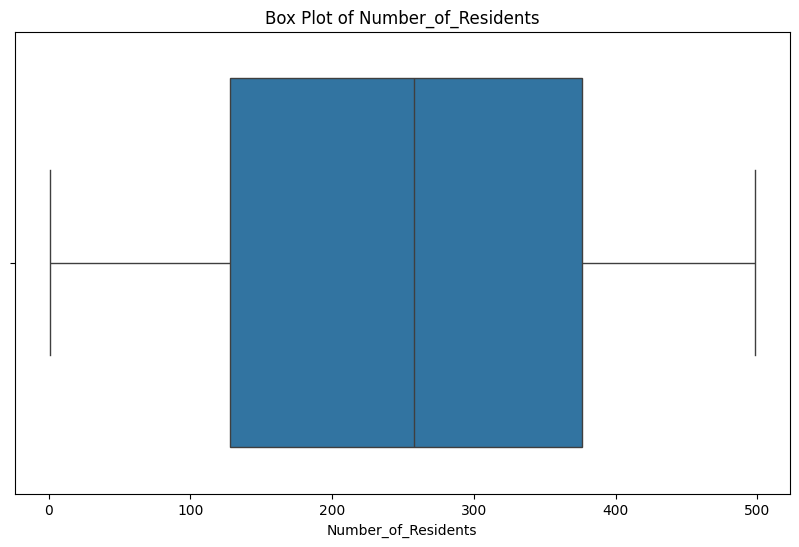

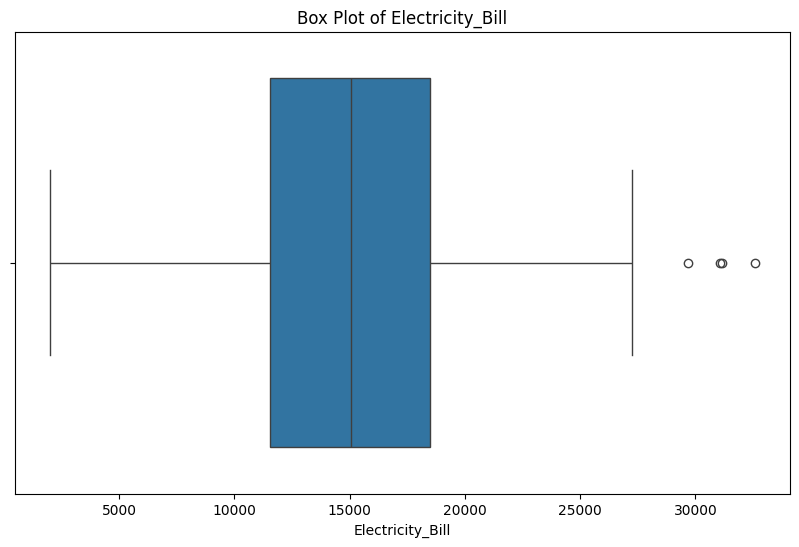

In [13]:
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


Box plots with respect to electricity bills

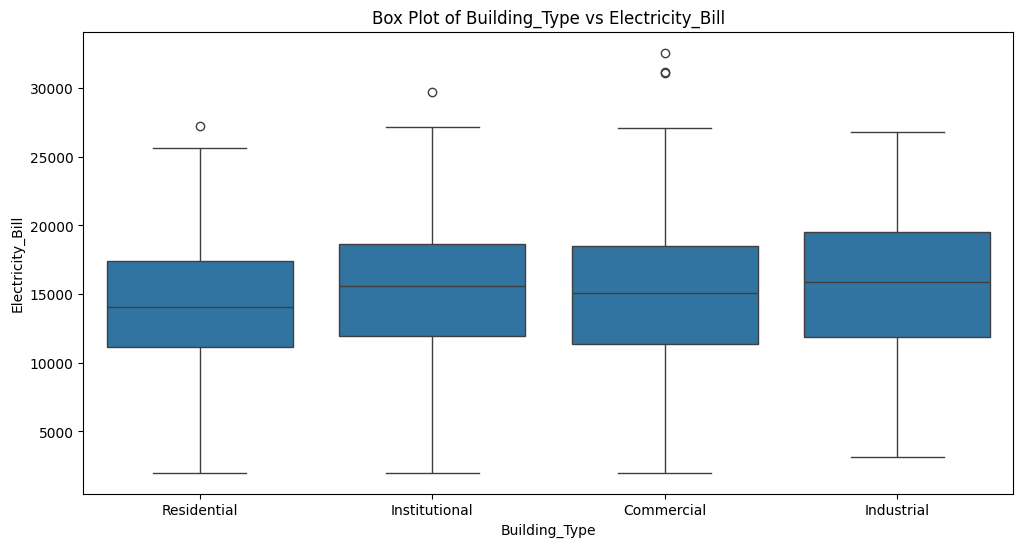

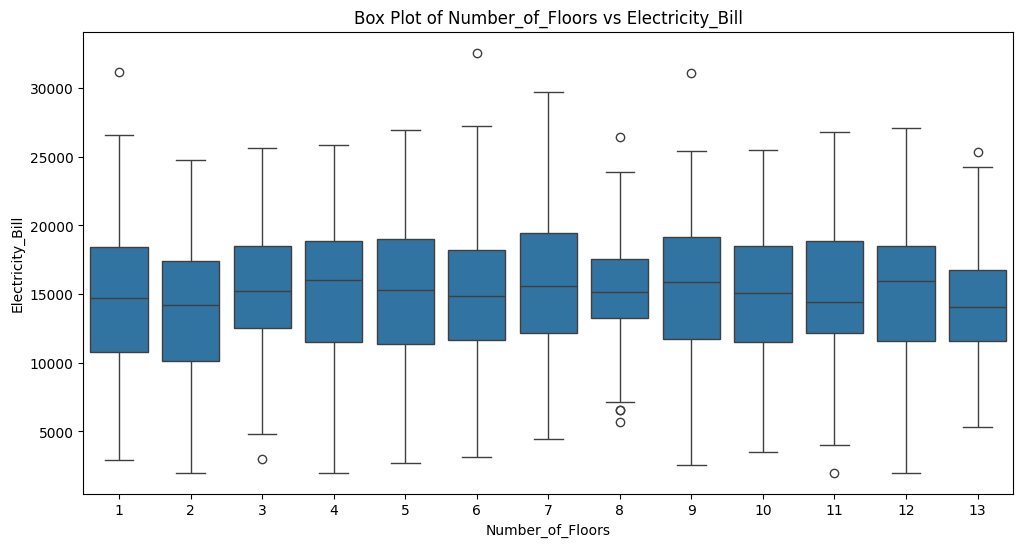

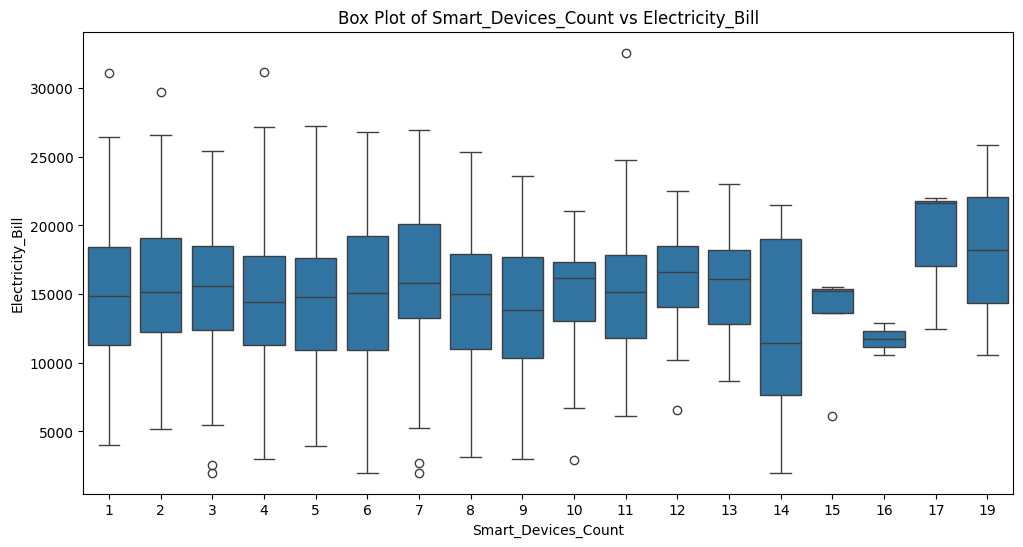

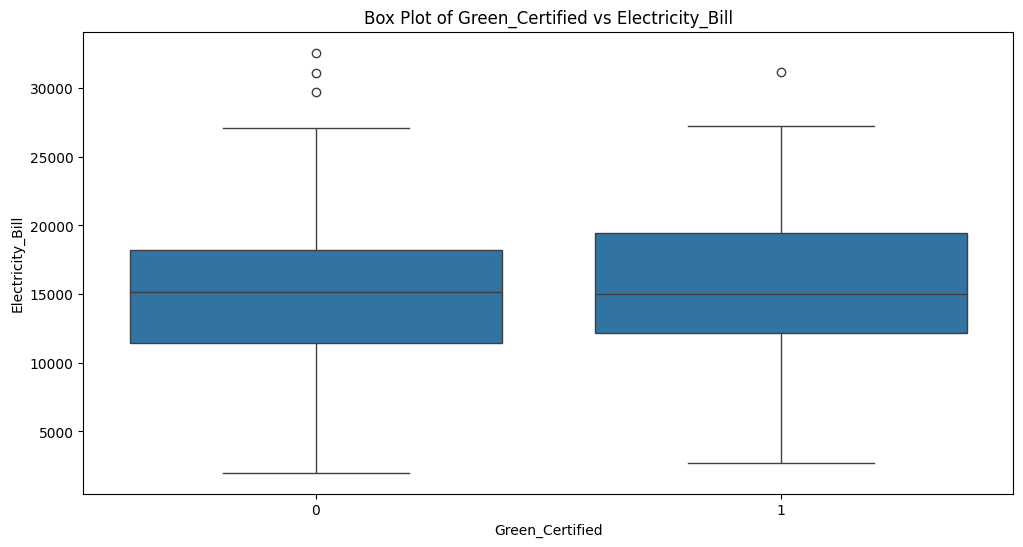

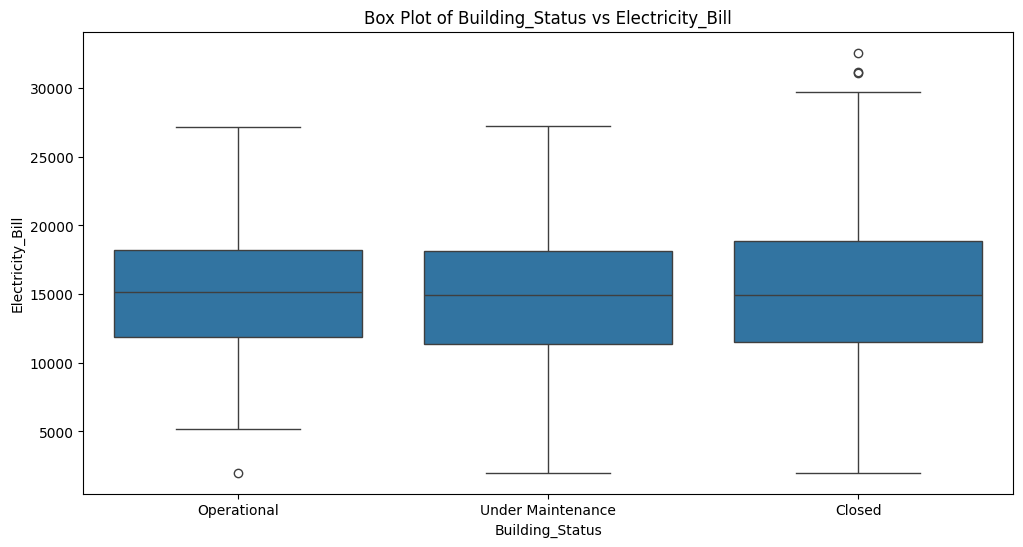

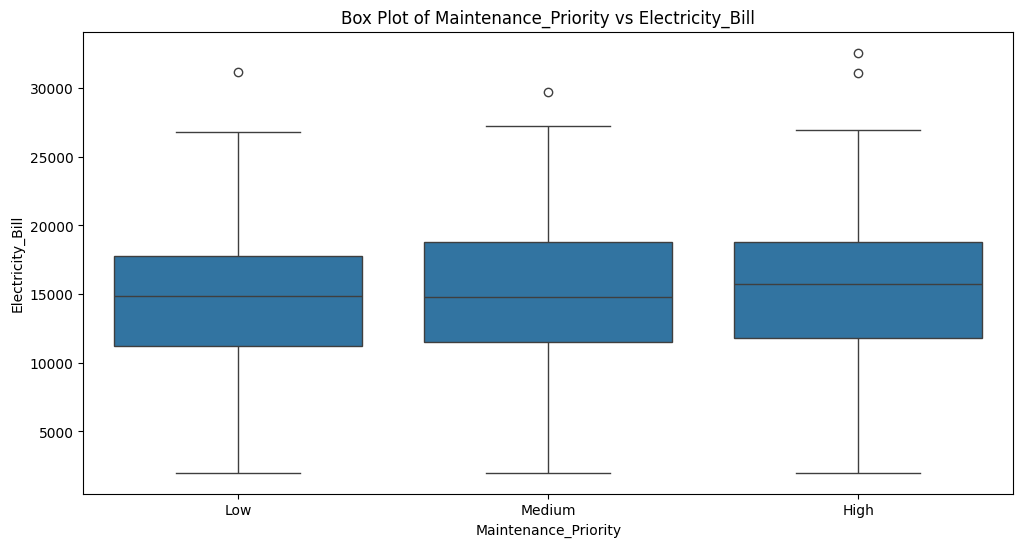

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'Electricity_Bill'

features = [col for col in train_df.columns if col != target_variable]

for feature in features:

    if len(train_df[feature].unique()) > 20:
        # print(f'Skipping feature {feature} with {len(train_df[feature].unique())} unique values')
        continue
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=train_df[feature], y=train_df[target_variable])
    plt.title(f'Box Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()


Violin Plots

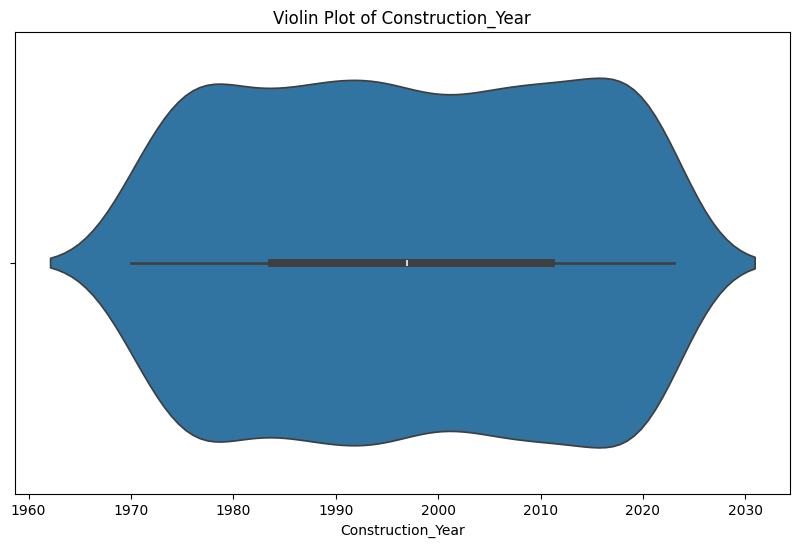

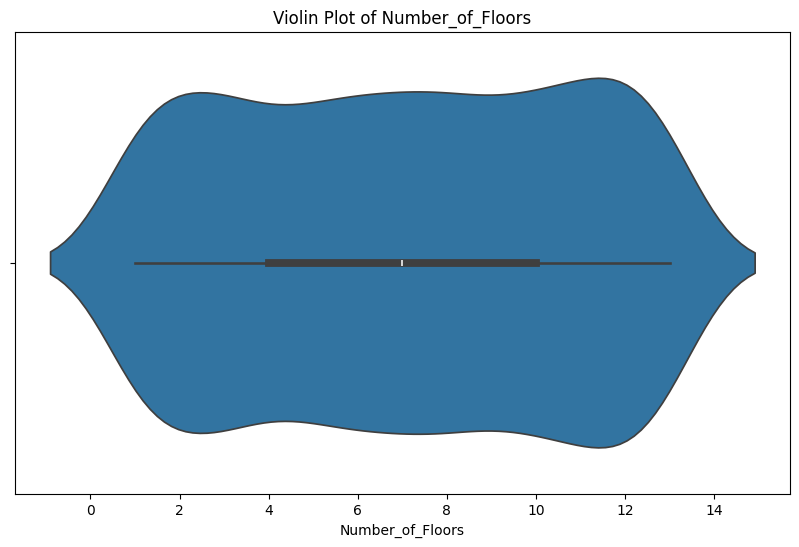

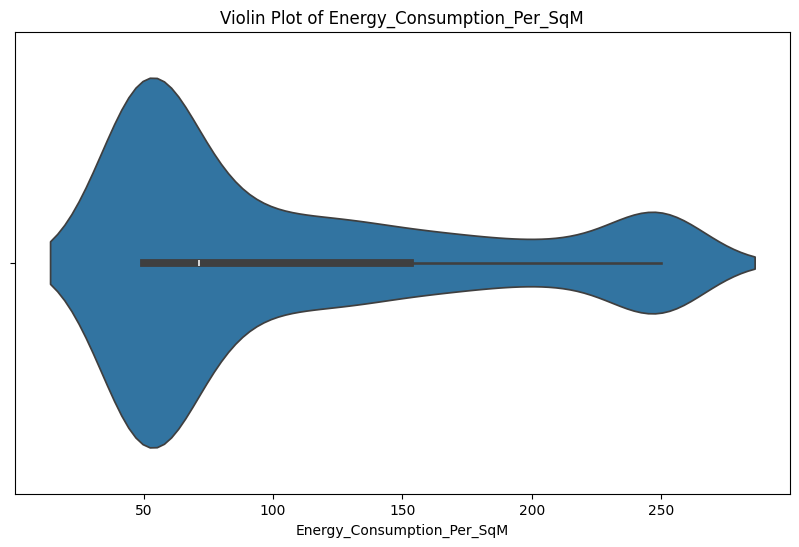

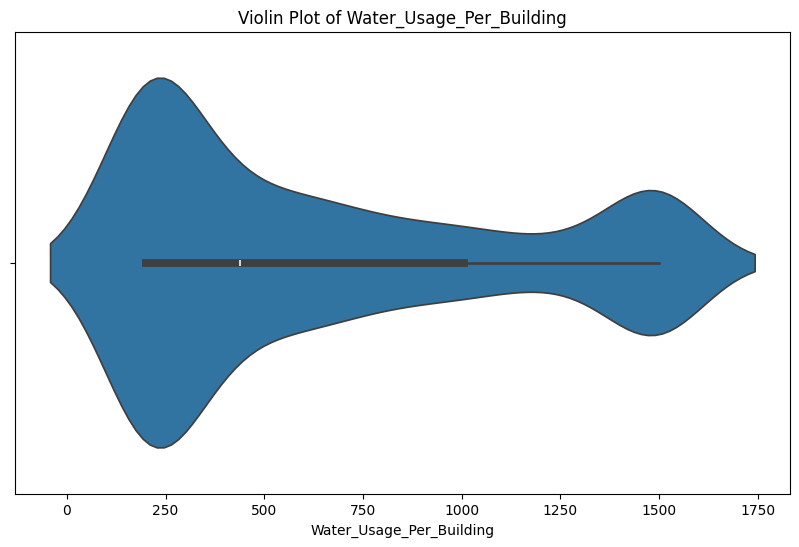

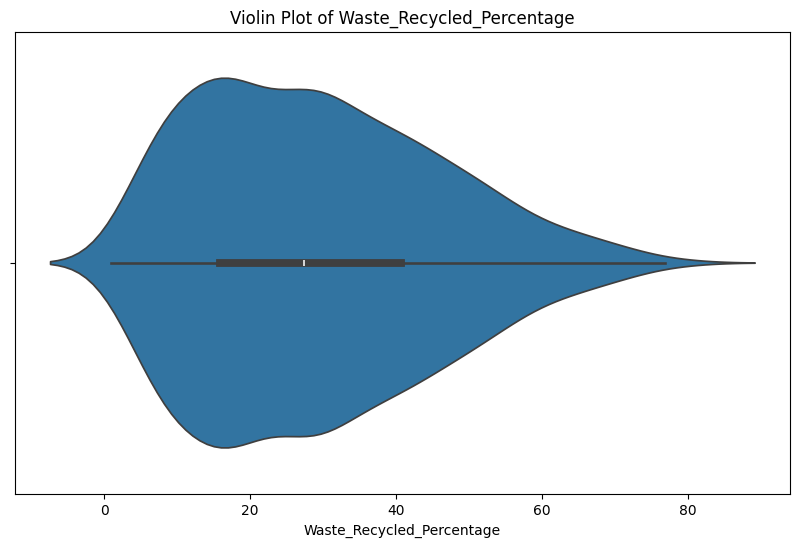

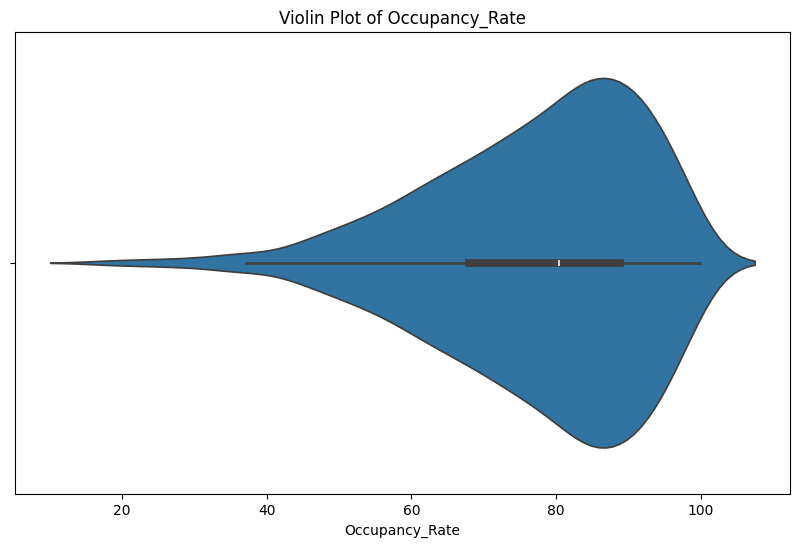

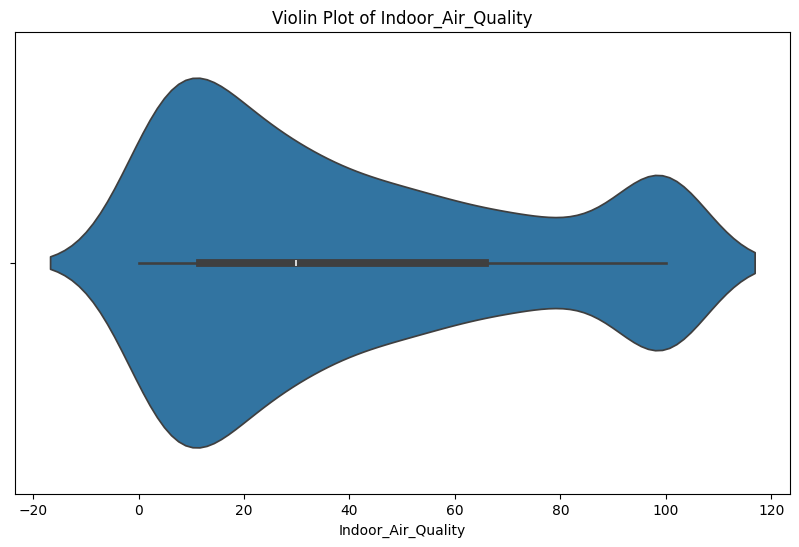

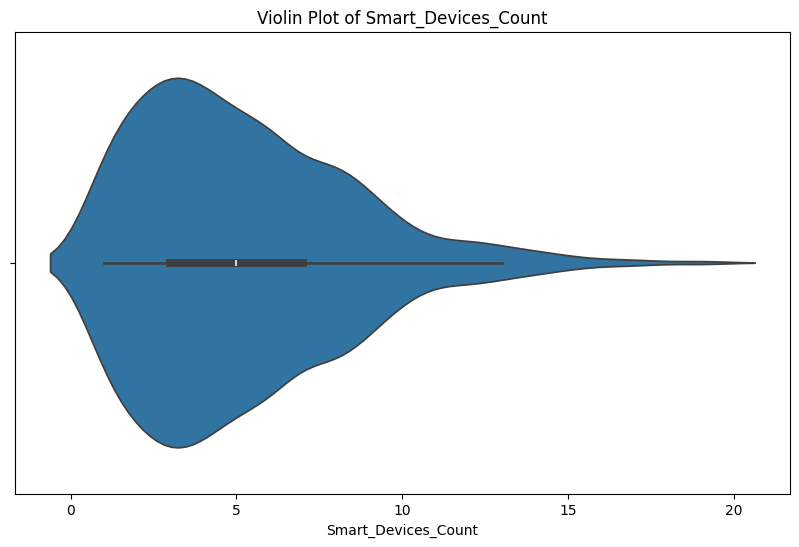

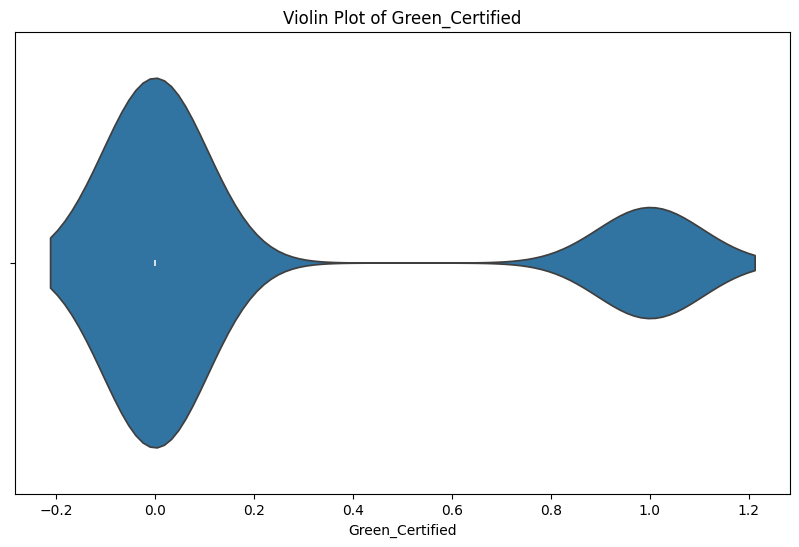

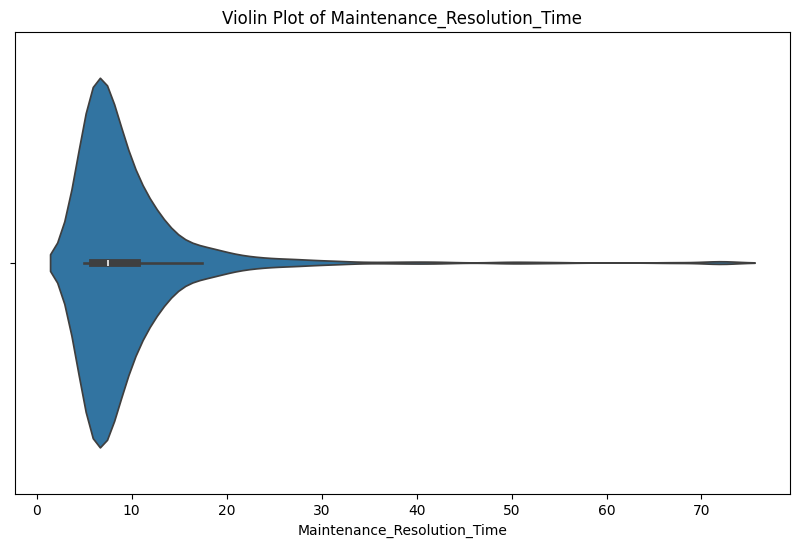

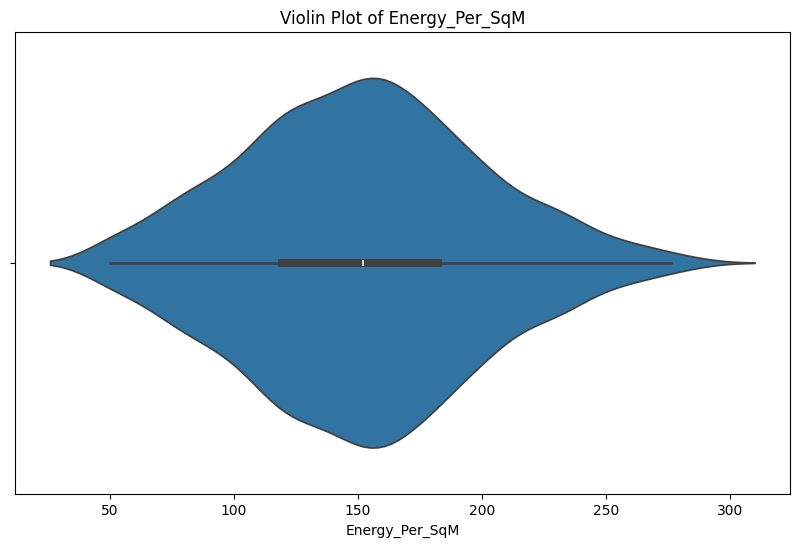

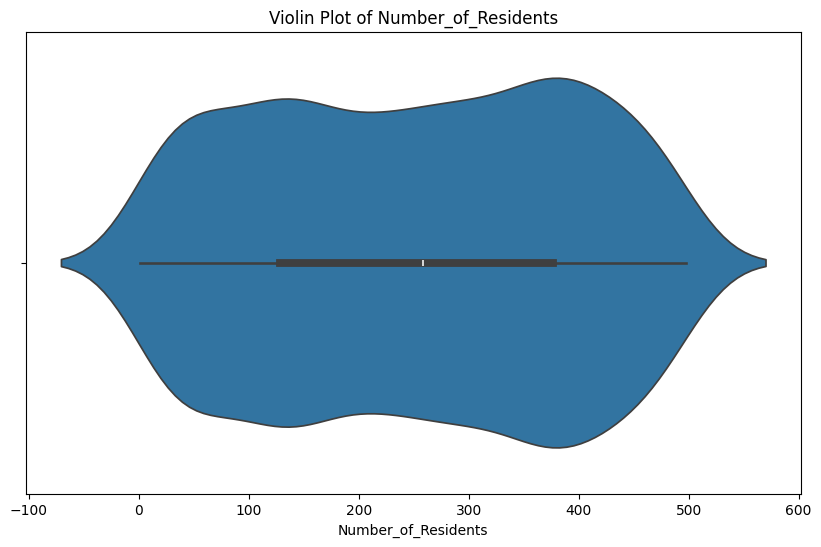

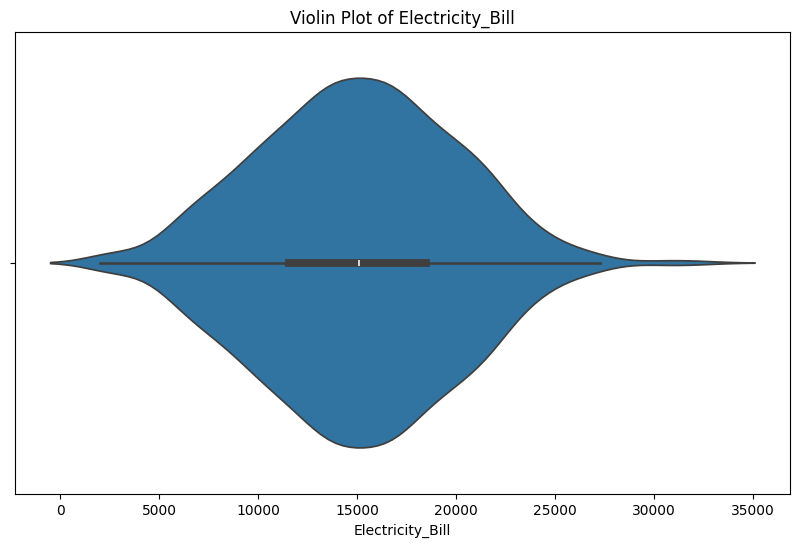

In [15]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=train_df[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.show()


Violin plots with respect to Electricity_Bill

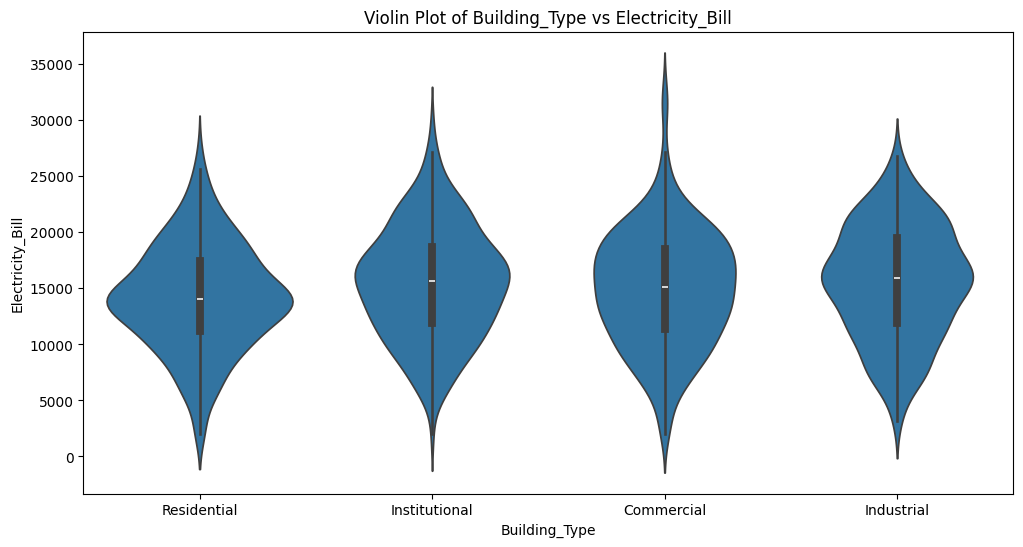

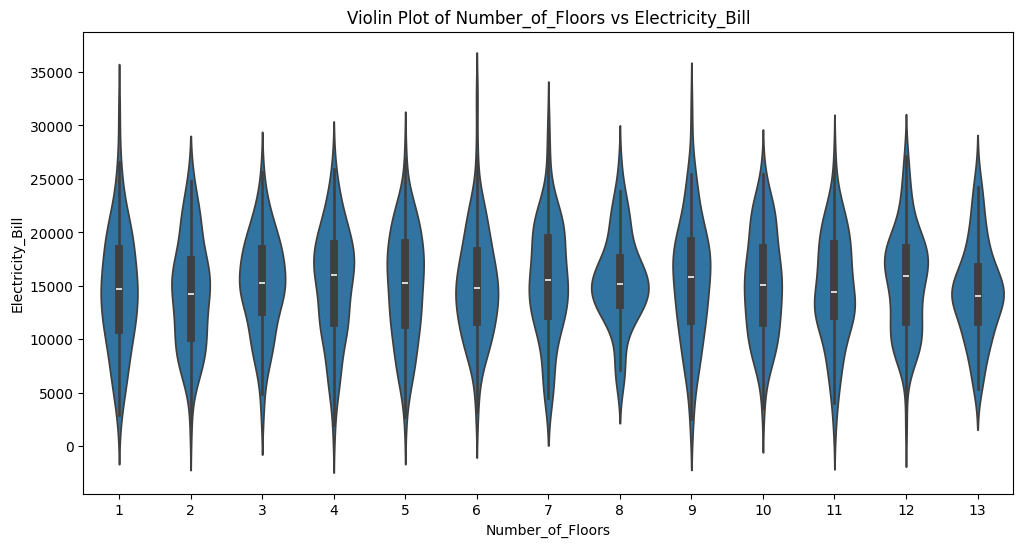

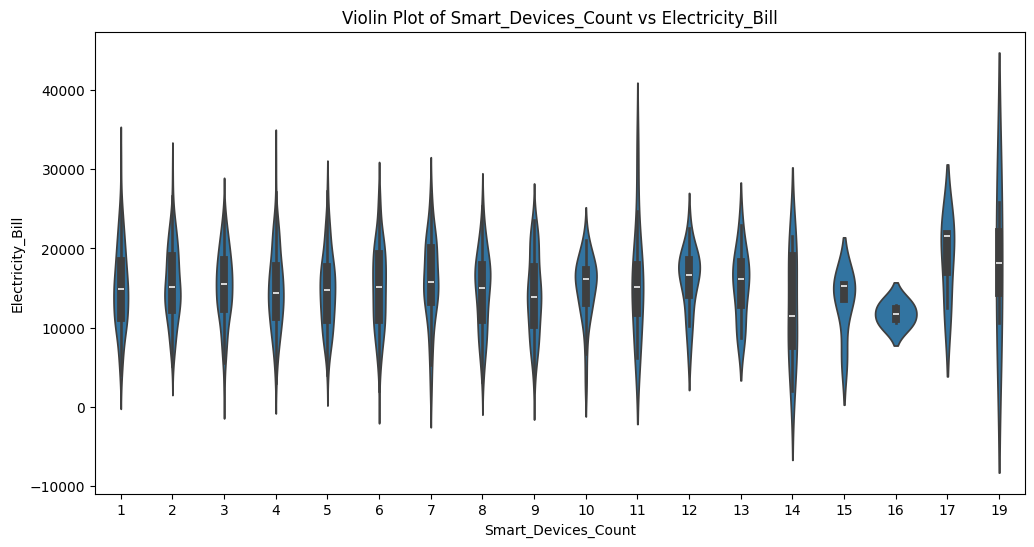

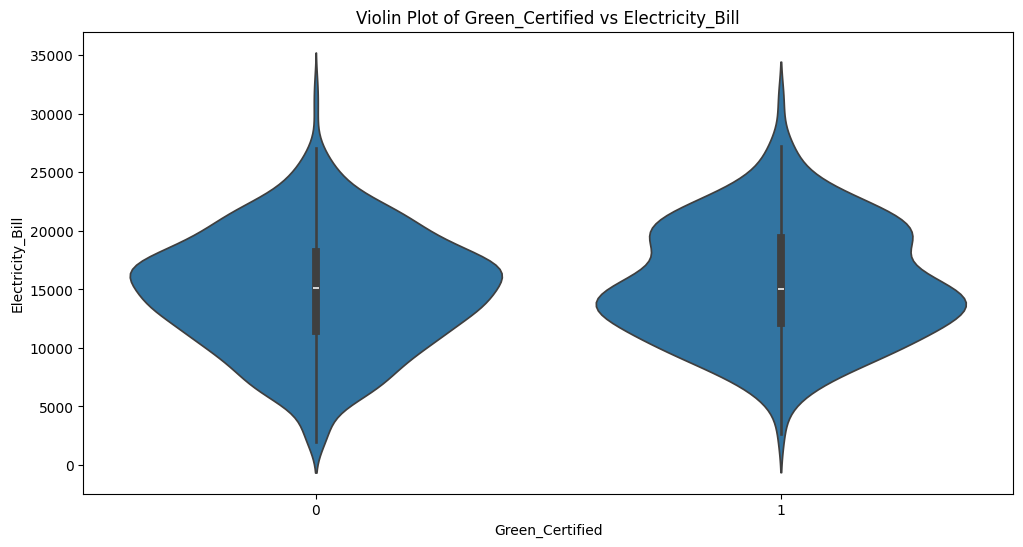

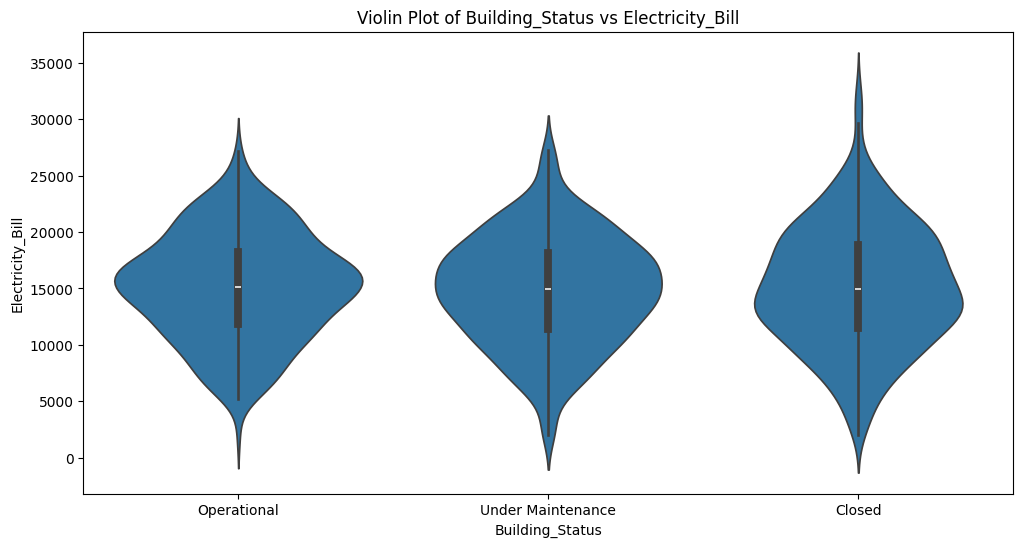

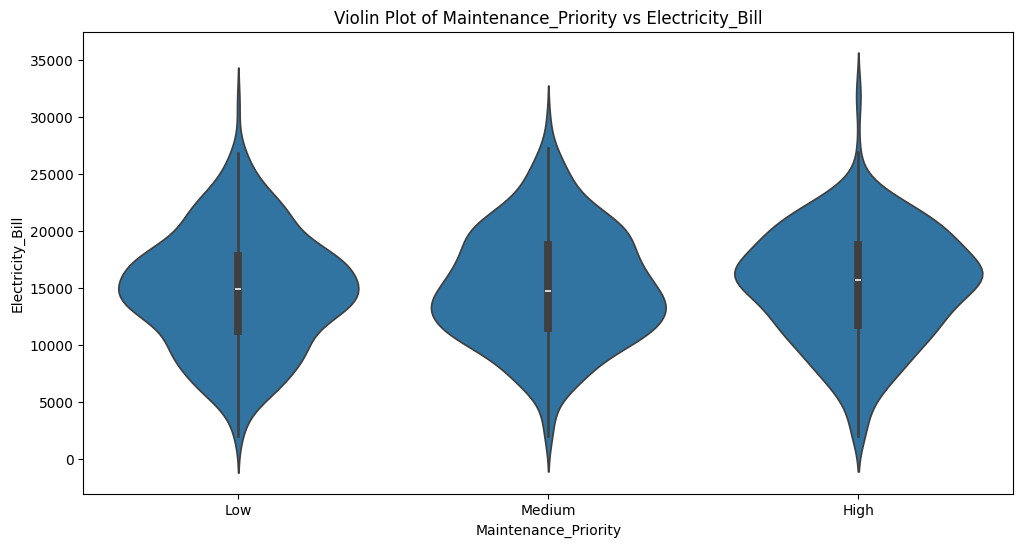

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'Electricity_Bill'

features = [col for col in train_df.columns if col != target_variable]

for feature in features:

    if len(train_df[feature].unique()) > 20:
        # print(f'Skipping feature {feature} with {len(train_df[feature].unique())} unique values')
        continue
    
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=train_df[feature], y=train_df[target_variable])
    plt.title(f'Violin Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()


Count Plots for Categorical Features

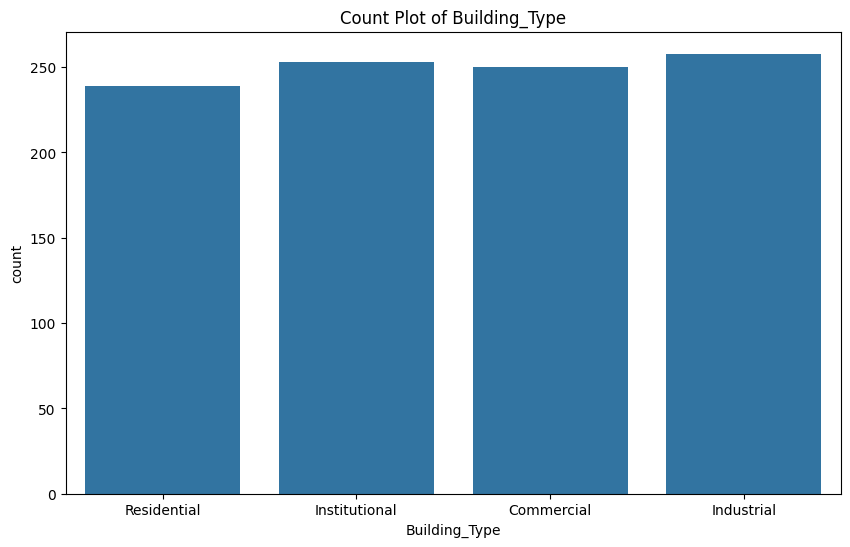

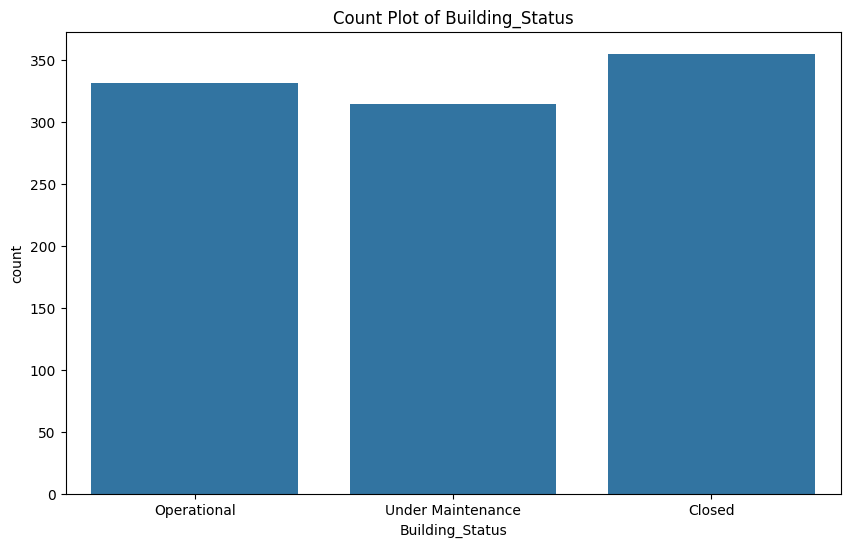

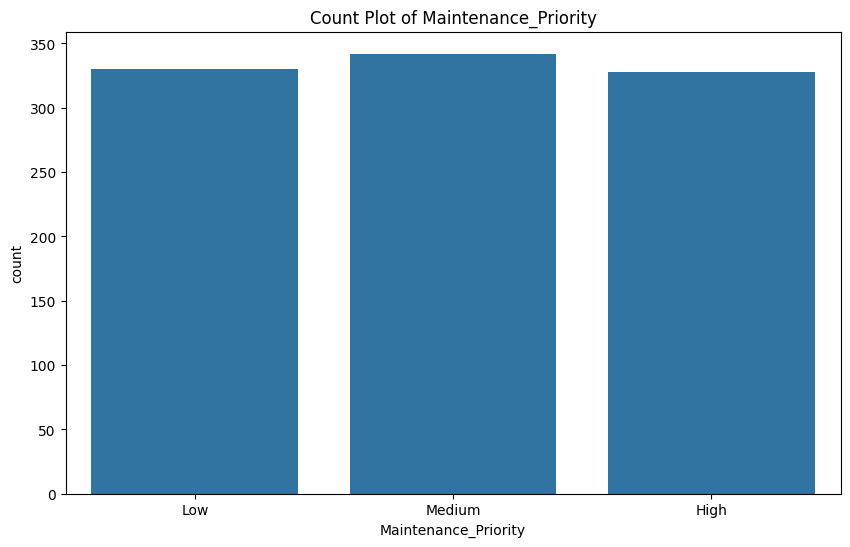

In [17]:
categorical_features = train_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=train_df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.show()

Correlation Heat Map

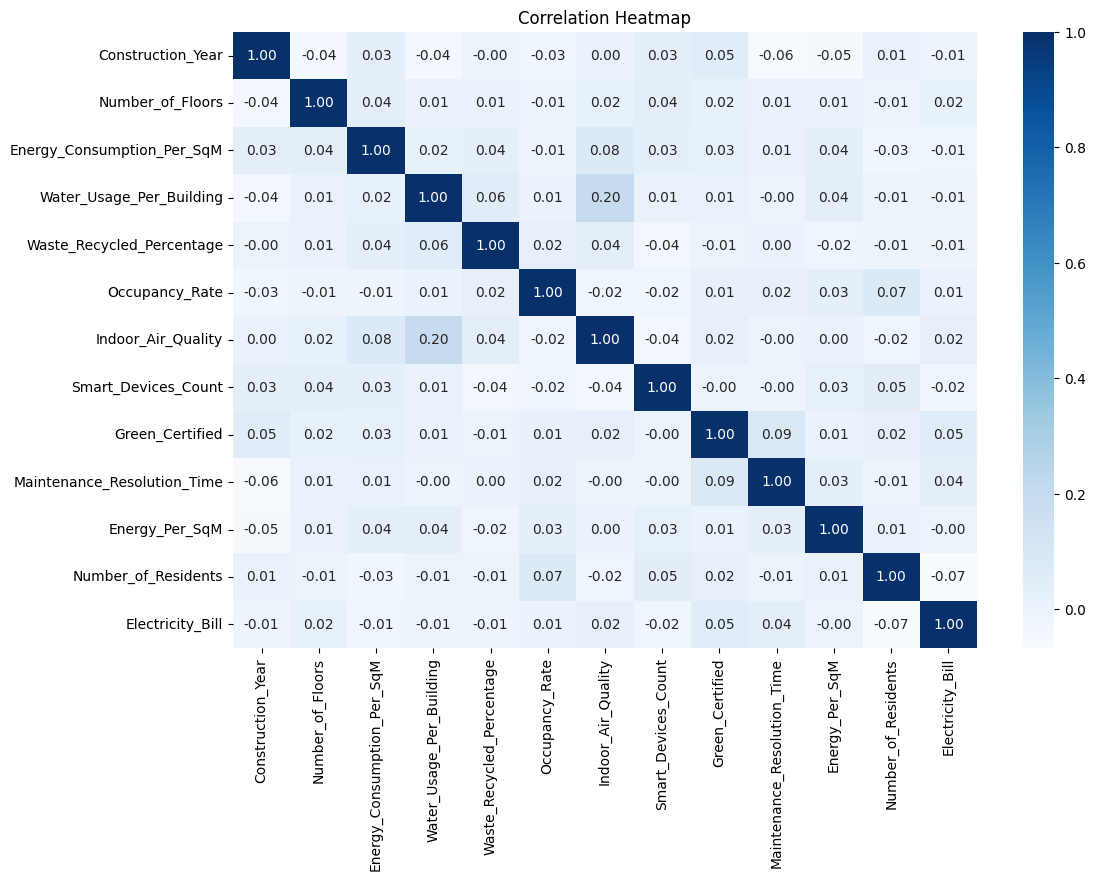

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = train_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## B.UMAP

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


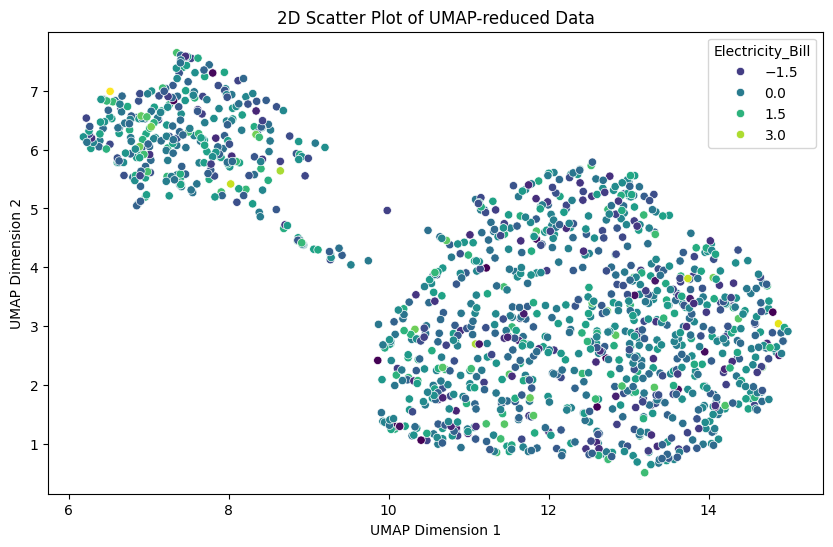

In [19]:
import umap

from sklearn.preprocessing import LabelEncoder, StandardScaler
umap_df= df.copy()
categorical_columns = umap_df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    umap_df[col] = label_encoder.fit_transform(umap_df[col])

scaler = StandardScaler()

numerical_columns = umap_df.select_dtypes(include=['float64', 'int64']).columns
umap_df[numerical_columns] = scaler.fit_transform(umap_df[numerical_columns])
reducer = umap.UMAP(n_components=2, random_state=42)

embedding = reducer.fit_transform(umap_df.drop(columns=["Electricity_Bill"]))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=umap_df[target_variable], palette='viridis')
plt.title('2D Scatter Plot of UMAP-reduced Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


## C. Preprocessing, Applying linear regression and reporting errors

Filtering training set with NA in any column

In [20]:

cleaned_df= df.dropna()
print(f'Original shape: {df.shape}')
print(f'Cleaned shape: {cleaned_df.shape}')


Original shape: (1250, 16)
Cleaned shape: (1250, 16)


Applying Normalization on numerical features

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# print(cleaned_df.head())
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
if 'Electricity_Bill' in numerical_columns:
    numerical_columns = numerical_columns.drop('Electricity_Bill')
cleaned_df[numerical_columns] = scaler.fit_transform(cleaned_df[numerical_columns])
print(cleaned_df.head())

   Building_Type  Construction_Year  Number_of_Floors  \
0    Residential          -0.492995          1.294186   
1  Institutional          -1.066600         -0.296505   
2     Industrial           0.590482          0.763956   
3     Commercial          -0.747930         -1.622080   
4     Industrial           0.590482          1.294186   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   -0.814197                 -0.349153   
1                    1.621769                 -0.921691   
2                   -0.138455                 -0.921691   
3                   -0.558199                 -0.921691   
4                   -0.814197                 -0.618406   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                   1.205746        0.300178           -0.793583   
1                   1.081897       -2.132641           -0.900518   
2                  -0.713141       -1.906147           -0.378754   
3                   1.778415  

 For categorical features, using Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'scaler' has been initialized
scaler = StandardScaler()

# Get categorical columns
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])

# Get numerical columns
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical columns
# Exclude 'Electricity_Bill' if needed, or ensure it's handled separately
if 'Electricity_Bill' in numerical_columns:
    numerical_columns = numerical_columns.drop('Electricity_Bill')

# Scale numerical columns
cleaned_df[numerical_columns] = scaler.fit_transform(cleaned_df[numerical_columns])

print(cleaned_df.head())


   Building_Type  Construction_Year  Number_of_Floors  \
0              3          -0.492995          1.294186   
1              2          -1.066600         -0.296505   
2              1           0.590482          0.763956   
3              0          -0.747930         -1.622080   
4              1           0.590482          1.294186   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   -0.814197                 -0.349153   
1                    1.621769                 -0.921691   
2                   -0.138455                 -0.921691   
3                   -0.558199                 -0.921691   
4                   -0.814197                 -0.618406   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                   1.205746        0.300178           -0.793583   
1                   1.081897       -2.132641           -0.900518   
2                  -0.713141       -1.906147           -0.378754   
3                   1.778415  

Applying Linear Regression on processed data

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = cleaned_df.drop(columns=['Electricity_Bill'])  # Features
y = cleaned_df['Electricity_Bill']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)


LinearRegression()

Evaluating model after pre-processing

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    

    n_train, p_train = X_train.shape
    adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))


    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    

    n_test, p_test = X_test.shape
    adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))
    

    print(f"Train Data Metrics:")
    print(f"  MSE: {mse_train:.4f}")
    print(f"  RMSE: {rmse_train:.4f}")
    print(f"  MAE: {mae_train:.4f}")
    print(f"  R²: {r2_train:.4f}")
    print(f"  Adjusted R²: {adjusted_r2_train:.4f}")
    
    print(f"\nTest Data Metrics:")
    print(f"  MSE: {mse_test:.4f}")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  MAE: {mae_test:.4f}")
    print(f"  R²: {r2_test:.4f}")
    print(f"  Adjusted R²: {adjusted_r2_test:.4f}")

    return {
        'train': {
            'MSE': mse_train,
            'RMSE': rmse_train,
            'MAE': mae_train,
            'R2': r2_train,
            'Adjusted R2': adjusted_r2_train
        },
        'test': {
            'MSE': mse_test,
            'RMSE': rmse_test,
            'MAE': mae_test,
            'R2': r2_test,
            'Adjusted R2': adjusted_r2_test
        }
    }


preprocessed_Evaluation= evaluate_model(model, X_train, y_train, X_test, y_test)


Train Data Metrics:
  MSE: 24475013.1685
  RMSE: 4947.2228
  MAE: 4006.3285
  R²: 0.0139
  Adjusted R²: -0.0011

Test Data Metrics:
  MSE: 24278016.1557
  RMSE: 4927.2727
  MAE: 3842.4093
  R²: 0.0000
  Adjusted R²: -0.0641


##  D. Performing Recursive Feature Elimination (RFE) and then Evaluating Model

In [25]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=3)

rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

x_train_rfe = X_train[selected_features]
x_test_rfe = X_test[selected_features]
# print(x_train_rfe.head())
model.fit(x_train_rfe, y_train)

evaluate_model(model, x_train_rfe, y_train, x_test_rfe, y_test)
# print(preprocessed_Evaluation)

Selected Features: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')
Train Data Metrics:
  MSE: 24569032.9069
  RMSE: 4956.7159
  MAE: 4006.4734
  R²: 0.0101
  Adjusted R²: 0.0072

Test Data Metrics:
  MSE: 23941409.0630
  RMSE: 4892.9959
  MAE: 3813.9481
  R²: 0.0139
  Adjusted R²: 0.0019


{'train': {'MSE': 24569032.906897984,
  'RMSE': 4956.715939702212,
  'MAE': 4006.4733775147365,
  'R2': 0.010134545491284008,
  'Adjusted R2': 0.007153023037944517},
 'test': {'MSE': 23941409.062998384,
  'RMSE': 4892.995918964002,
  'MAE': 3813.948128176773,
  'R2': 0.013901513867940807,
  'Adjusted R2': 0.0018759225736473262}}

## E. Encoding the categorical features of the original dataset using One-Hot Encoding and performing Ridge Regression on the preprocessed data

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

categorical_columns = df.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  


encoded_features = one_hot_encoder.fit_transform(df[categorical_columns])


encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

temp_df = df.drop(columns=categorical_columns).reset_index(drop=True)

encoded_df = pd.concat([temp_df, encoded_df], axis=1)

target_variable = 'Electricity_Bill'
y = encoded_df[target_variable]  

X = encoded_df.drop(columns=[target_variable])

scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(fit_intercept=True, random_state=42, alpha=10)  
ridge_model.fit(X_train, y_train)

Ridge_Evaluation = evaluate_model(ridge_model, X_train, y_train, X_test, y_test)


Train Data Metrics:
  MSE: 24188990.4560
  RMSE: 4918.2304
  MAE: 3976.5520
  R²: 0.0254
  Adjusted R²: 0.0066

Test Data Metrics:
  MSE: 24125368.4749
  RMSE: 4911.7582
  MAE: 3797.2657
  R²: 0.0063
  Adjusted R²: -0.0758


## F.  Performing Independent Component Analysis (ICA) on the one-hot encoded dataset

In [27]:
from sklearn.decomposition import FastICA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

components_list = [4, 5, 6, 8]




for n_components in components_list:
    print(f"\nApplying ICA with {n_components} components")
    
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_ica, y_train)
    
    evaluate_model(model, X_train_ica, y_train, X_test_ica, y_test)






Applying ICA with 4 components
Train Data Metrics:
  MSE: 24592683.6728
  RMSE: 4959.1011
  MAE: 3978.6106
  R²: 0.0092
  Adjusted R²: 0.0052

Test Data Metrics:
  MSE: 24254425.2912
  RMSE: 4924.8782
  MAE: 3804.8008
  R²: 0.0010
  Adjusted R²: -0.0153

Applying ICA with 5 components
Train Data Metrics:
  MSE: 24590495.7479
  RMSE: 4958.8805
  MAE: 3979.3119
  R²: 0.0093
  Adjusted R²: 0.0043

Test Data Metrics:
  MSE: 24282870.5837
  RMSE: 4927.7653
  MAE: 3807.4586
  R²: -0.0002
  Adjusted R²: -0.0207

Applying ICA with 6 components
Train Data Metrics:
  MSE: 24559793.5359
  RMSE: 4955.7838
  MAE: 3978.3358
  R²: 0.0105
  Adjusted R²: 0.0045

Test Data Metrics:
  MSE: 24179430.4623
  RMSE: 4917.2584
  MAE: 3799.7115
  R²: 0.0041
  Adjusted R²: -0.0205

Applying ICA with 8 components
Train Data Metrics:
  MSE: 24426737.5723
  RMSE: 4942.3413
  MAE: 3973.2972
  R²: 0.0159
  Adjusted R²: 0.0079

Test Data Metrics:
  MSE: 24209820.6116
  RMSE: 4920.3476
  MAE: 3796.0956
  R²: 0.0028
  

## G.  Using ElasticNet regularization (which combines L1 and L2) while training a linear model on the preprocessed dataset from part (c).

In [28]:
from sklearn.linear_model import ElasticNet
X = cleaned_df.drop(columns=['Electricity_Bill'])  # Features
y = cleaned_df['Electricity_Bill']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nalpha: "+str(0.01))
ElasticNet_model= ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
ElasticNet_model.fit(X_train, y_train)
ElasticNet_model_Evaluation = evaluate_model(ElasticNet_model, X_train, y_train, X_test, y_test)
print("\nalpha: "+str(0.1))
ElasticNet_model= ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
ElasticNet_model.fit(X_train, y_train)
ElasticNet_model_Evaluation = evaluate_model(ElasticNet_model, X_train, y_train, X_test, y_test)
print("\nalpha: "+str(1))
ElasticNet_model= ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
ElasticNet_model.fit(X_train, y_train)
ElasticNet_model_Evaluation = evaluate_model(ElasticNet_model, X_train, y_train, X_test, y_test)
print("\nalpha: "+str(10))
ElasticNet_model= ElasticNet(alpha=10, l1_ratio=0.5, random_state=42)
ElasticNet_model.fit(X_train, y_train)
ElasticNet_model_Evaluation = evaluate_model(ElasticNet_model, X_train, y_train, X_test, y_test)



alpha: 0.01
Train Data Metrics:
  MSE: 24475021.7061
  RMSE: 4947.2236
  MAE: 4006.2253
  R²: 0.0139
  Adjusted R²: -0.0011

Test Data Metrics:
  MSE: 24276757.8815
  RMSE: 4927.1450
  MAE: 3842.2209
  R²: 0.0001
  Adjusted R²: -0.0640

alpha: 0.1
Train Data Metrics:
  MSE: 24475793.2838
  RMSE: 4947.3016
  MAE: 4005.3930
  R²: 0.0139
  Adjusted R²: -0.0011

Test Data Metrics:
  MSE: 24266701.4289
  RMSE: 4926.1244
  MAE: 3841.0938
  R²: 0.0005
  Adjusted R²: -0.0636

alpha: 1
Train Data Metrics:
  MSE: 24512862.9956
  RMSE: 4951.0467
  MAE: 4001.7690
  R²: 0.0124
  Adjusted R²: -0.0027

Test Data Metrics:
  MSE: 24231900.6448
  RMSE: 4922.5908
  MAE: 3835.0163
  R²: 0.0019
  Adjusted R²: -0.0620

alpha: 10
Train Data Metrics:
  MSE: 24714505.1994
  RMSE: 4971.3685
  MAE: 4004.7030
  R²: 0.0043
  Adjusted R²: -0.0109

Test Data Metrics:
  MSE: 24303481.5553
  RMSE: 4929.8561
  MAE: 3837.4646
  R²: -0.0010
  Adjusted R²: -0.0652


In [29]:
from sklearn.ensemble import GradientBoostingRegressor


GBR_model = GradientBoostingRegressor(random_state=42)
GBR_model.fit(X_train, y_train)

GBR_model_Evaluation = evaluate_model(GBR_model, X_train, y_train, X_test, y_test)


Train Data Metrics:
  MSE: 14926446.2573
  RMSE: 3863.4759
  MAE: 3092.7482
  R²: 0.3986
  Adjusted R²: 0.3895

Test Data Metrics:
  MSE: 24392500.9011
  RMSE: 4938.8765
  MAE: 3815.7032
  R²: -0.0047
  Adjusted R²: -0.0691
